#1: File Extraction

In [137]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette("viridis")

In [138]:
#Load data
import zipfile
import os

zip_path = '/content/drive/MyDrive/AAI_530_Project/single+elder+home+monitoring+gas+and+position.zip'
extract_dir = '/content/drive/MyDrive/AAI_530_Project/extracted_data'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract all contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to: {extract_dir}")
print("Contents of the extracted directory:")
for root, dirs, files in os.walk(extract_dir):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

Files extracted to: /content/drive/MyDrive/AAI_530_Project/extracted_data
Contents of the extracted directory:
/content/drive/MyDrive/AAI_530_Project/extracted_data/DB elder monitoring
/content/drive/MyDrive/AAI_530_Project/extracted_data/__MACOSX
/content/drive/MyDrive/AAI_530_Project/extracted_data/DB elder monitoring/database_gas.csv
/content/drive/MyDrive/AAI_530_Project/extracted_data/DB elder monitoring/data_ref_until_2020-02-13.csv
/content/drive/MyDrive/AAI_530_Project/extracted_data/DB elder monitoring/database_pos.csv
/content/drive/MyDrive/AAI_530_Project/extracted_data/__MACOSX/._DB elder monitoring
/content/drive/MyDrive/AAI_530_Project/extracted_data/__MACOSX/DB elder monitoring
/content/drive/MyDrive/AAI_530_Project/extracted_data/__MACOSX/DB elder monitoring/._data_ref_until_2020-02-13.csv
/content/drive/MyDrive/AAI_530_Project/extracted_data/__MACOSX/DB elder monitoring/._database_gas.csv
/content/drive/MyDrive/AAI_530_Project/extracted_data/__MACOSX/DB elder monitorin

In [139]:
#Load the three CSV files

gas_df = pd.read_csv("/content/drive/MyDrive/AAI_530_Project/extracted_data/DB elder monitoring/database_gas.csv")
pos_df = pd.read_csv("/content/drive/MyDrive/AAI_530_Project/extracted_data/DB elder monitoring/database_pos.csv")
ref_df = pd.read_csv("/content/drive/MyDrive/AAI_530_Project/extracted_data/DB elder monitoring/data_ref_until_2020-02-13.csv")

#1.1: Data Structure & Integrity Checks

In [144]:
#gas dataset check
gas_df.info()
gas_df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416153 entries, 0 to 416152
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   timestamp      416153 non-null  object 
 1   temperature    416153 non-null  float64
 2   humidity       416153 non-null  float64
 3   CO2CosIRValue  416153 non-null  float64
 4   CO2MG811Value  416153 non-null  float64
 5   MOX1           416153 non-null  float64
 6   MOX2           416153 non-null  float64
 7   MOX3           416153 non-null  float64
 8   MOX4           416153 non-null  float64
 9   COValue        416153 non-null  float64
dtypes: float64(9), object(1)
memory usage: 31.8+ MB


(416153, 10)

In [145]:
gas_df.head()

timestamp  temperature  humidity  CO2CosIRValue  \
0  2019-11-06 11:37:13.038174+01:00        19.48     54.86          128.0   
1  2019-11-06 11:37:32.744996+01:00        19.59     54.23          129.0   
2  2019-11-06 11:37:53.018087+01:00        19.63     54.05          128.0   
3  2019-11-06 11:38:13.093151+01:00        19.64     53.74          128.0   
4  2019-11-06 11:38:33.032832+01:00        19.67     53.53          128.0   

   CO2MG811Value   MOX1   MOX2   MOX3   MOX4  COValue  
0          563.0  476.0  731.0  649.0  565.0    128.0  
1          563.0  477.0  731.0  649.0  565.0    125.0  
2          566.0  478.0  732.0  649.0  565.0    125.0  
3          566.0  478.0  732.0  649.0  565.0    125.0  
4          569.0  480.0  732.0  650.0  565.0    125.0

In [146]:
#position dataset check
pos_df.info()
pos_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28478 entries, 0 to 28477
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     28478 non-null  object 
 1   Living room  8866 non-null   float64
 2   Bedroom      3161 non-null   float64
 3   Bathroom     5953 non-null   float64
 4   Kitchen      2521 non-null   float64
 5   Hallway      7948 non-null   float64
dtypes: float64(5), object(1)
memory usage: 1.3+ MB


(28478, 6)

In [147]:
pos_df.head()

datetime  Living room  Bedroom  Bathroom  \
0  2019-11-01 02:52:55.271086300+00:00          NaN      0.0       NaN   
1  2019-11-01 03:19:57.417067700+00:00          NaN      1.0       NaN   
2  2019-11-01 03:21:53.257070700+00:00          NaN      0.0       NaN   
3     2019-11-01 05:11:08.874031+00:00          NaN      1.0       NaN   
4  2019-11-01 05:12:38.437033500+00:00          NaN      0.0       NaN   

   Kitchen  Hallway  
0      NaN      NaN  
1      NaN      NaN  
2      NaN      NaN  
3      NaN      NaN  
4      NaN      NaN

In [148]:
#Reference dataset check

ref_df.info()
ref_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      75511 non-null  object 
 1   temperature    75511 non-null  float64
 2   humidity       75511 non-null  float64
 3   CO2CosIRValue  75511 non-null  float64
 4   CO2MG811Value  75511 non-null  float64
 5   MOX1           75511 non-null  float64
 6   MOX2           75511 non-null  float64
 7   MOX3           75511 non-null  float64
 8   MOX4           75511 non-null  float64
 9   COValue        75511 non-null  float64
dtypes: float64(9), object(1)
memory usage: 5.8+ MB


(75511, 10)

In [149]:
ref_df.head()

timestamp  temperature  humidity  CO2CosIRValue  \
0  2020-01-25 00:01:49.251503+01:00        20.64     55.57          121.0   
1  2020-01-25 00:02:09.350082+01:00        20.64     55.53          122.0   
2  2020-01-25 00:02:29.319505+01:00        20.62     55.53          121.0   
3  2020-01-25 00:02:49.399379+01:00        20.62     55.57          121.0   
4  2020-01-25 00:03:09.158989+01:00        20.62     55.59          121.0   

   CO2MG811Value   MOX1   MOX2   MOX3   MOX4  COValue  
0          496.0  521.0  694.0  652.0  591.0    135.0  
1          495.0  521.0  694.0  652.0  591.0    135.0  
2          495.0  522.0  694.0  651.0  591.0    135.0  
3          495.0  522.0  694.0  651.0  591.0    135.0  
4          495.0  522.0  694.0  652.0  591.0    135.0

In [150]:
ref_df['timestamp'].dtype


dtype('O')

#2: Conversion of Timestamp to Datetime

In [151]:
#Gas timestamp conversion to datetime
gas_df['timestamp'] = pd.to_datetime(gas_df['timestamp'], utc=True)
gas_df.dtypes



timestamp        datetime64[ns, UTC]
temperature                  float64
humidity                     float64
CO2CosIRValue                float64
CO2MG811Value                float64
MOX1                         float64
MOX2                         float64
MOX3                         float64
MOX4                         float64
COValue                      float64
dtype: object

In [152]:
#position timestamp conversion to datetime
pos_df['datetime'] = pd.to_datetime(pos_df['datetime'], utc=True)
pos_df.dtypes

datetime       datetime64[ns, UTC]
Living room                float64
Bedroom                    float64
Bathroom                   float64
Kitchen                    float64
Hallway                    float64
dtype: object

In [153]:
#Reference timestamp conversion to datetime
ref_df['timestamp'] = pd.to_datetime(ref_df['timestamp'], utc=True )
ref_df.dtypes

timestamp        datetime64[ns, UTC]
temperature                  float64
humidity                     float64
CO2CosIRValue                float64
CO2MG811Value                float64
MOX1                         float64
MOX2                         float64
MOX3                         float64
MOX4                         float64
COValue                      float64
dtype: object

#3: Standardize Column Names for consistency

In [154]:

#Clean column names
gas_df.columns = gas_df.columns.str.lower().str.strip()
pos_df.columns = pos_df.columns.str.lower().str.strip()
ref_df.columns = ref_df.columns.str.lower().str.strip()


In [155]:
gas_df.head()


timestamp  temperature  humidity  co2cosirvalue  \
0 2019-11-06 10:37:13.038174+00:00        19.48     54.86          128.0   
1 2019-11-06 10:37:32.744996+00:00        19.59     54.23          129.0   
2 2019-11-06 10:37:53.018087+00:00        19.63     54.05          128.0   
3 2019-11-06 10:38:13.093151+00:00        19.64     53.74          128.0   
4 2019-11-06 10:38:33.032832+00:00        19.67     53.53          128.0   

   co2mg811value   mox1   mox2   mox3   mox4  covalue  
0          563.0  476.0  731.0  649.0  565.0    128.0  
1          563.0  477.0  731.0  649.0  565.0    125.0  
2          566.0  478.0  732.0  649.0  565.0    125.0  
3          566.0  478.0  732.0  649.0  565.0    125.0  
4          569.0  480.0  732.0  650.0  565.0    125.0

In [156]:

pos_df.head()




datetime  living room  bedroom  bathroom  \
0 2019-11-01 02:52:55.271086300+00:00          NaN      0.0       NaN   
1 2019-11-01 03:19:57.417067700+00:00          NaN      1.0       NaN   
2 2019-11-01 03:21:53.257070700+00:00          NaN      0.0       NaN   
3    2019-11-01 05:11:08.874031+00:00          NaN      1.0       NaN   
4 2019-11-01 05:12:38.437033500+00:00          NaN      0.0       NaN   

   kitchen  hallway  
0      NaN      NaN  
1      NaN      NaN  
2      NaN      NaN  
3      NaN      NaN  
4      NaN      NaN

In [157]:

ref_df.head()

timestamp  temperature  humidity  co2cosirvalue  \
0 2020-01-24 23:01:49.251503+00:00        20.64     55.57          121.0   
1 2020-01-24 23:02:09.350082+00:00        20.64     55.53          122.0   
2 2020-01-24 23:02:29.319505+00:00        20.62     55.53          121.0   
3 2020-01-24 23:02:49.399379+00:00        20.62     55.57          121.0   
4 2020-01-24 23:03:09.158989+00:00        20.62     55.59          121.0   

   co2mg811value   mox1   mox2   mox3   mox4  covalue  
0          496.0  521.0  694.0  652.0  591.0    135.0  
1          495.0  521.0  694.0  652.0  591.0    135.0  
2          495.0  522.0  694.0  651.0  591.0    135.0  
3          495.0  522.0  694.0  651.0  591.0    135.0  
4          495.0  522.0  694.0  652.0  591.0    135.0

#4: Converting Sensor Values to Numeric
(This is converting all numbers into either int ot float. Anything that isn't number into NAN)

In [158]:
# Sensor values to numeric

for col in gas_df.columns:
    if col != 'timestamp':
        gas_df[col] = pd.to_numeric(gas_df[col], errors='coerce')

for col in pos_df.columns:
    if col != 'datetime': # Exclude 'datetime' column for pos_df
        pos_df[col] = pd.to_numeric(pos_df[col], errors='coerce')

#5: Analyze Missing Data (Before Removing Anything)
 after reviewing the data, the Position dataset is only dataset showing missing data.

In [159]:
#Missing count per column
missing_counts = pos_df.isna().sum()
missing_counts


datetime           0
living room    19612
bedroom        25317
bathroom       22525
kitchen        25957
hallway        20530
dtype: int64

In [160]:
#Percentage of missing count per column
missing_percent = (pos_df.isna().sum() / len(pos_df)) * 100
missing_percent


datetime        0.000000
living room    68.867196
bedroom        88.900204
bathroom       79.096144
kitchen        91.147552
hallway        72.090737
dtype: float64

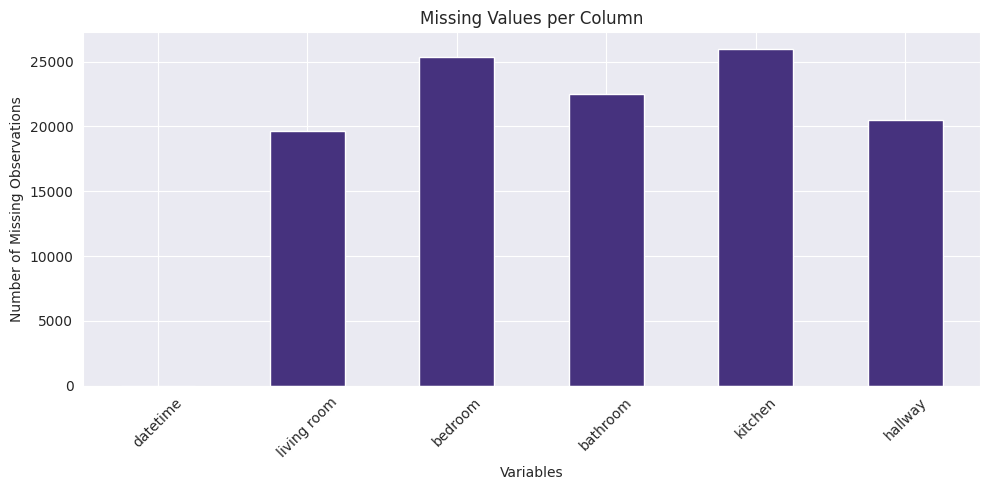

In [162]:

missing_counts.plot(kind='bar', figsize=(10,5))
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Observations")
plt.xlabel("Variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


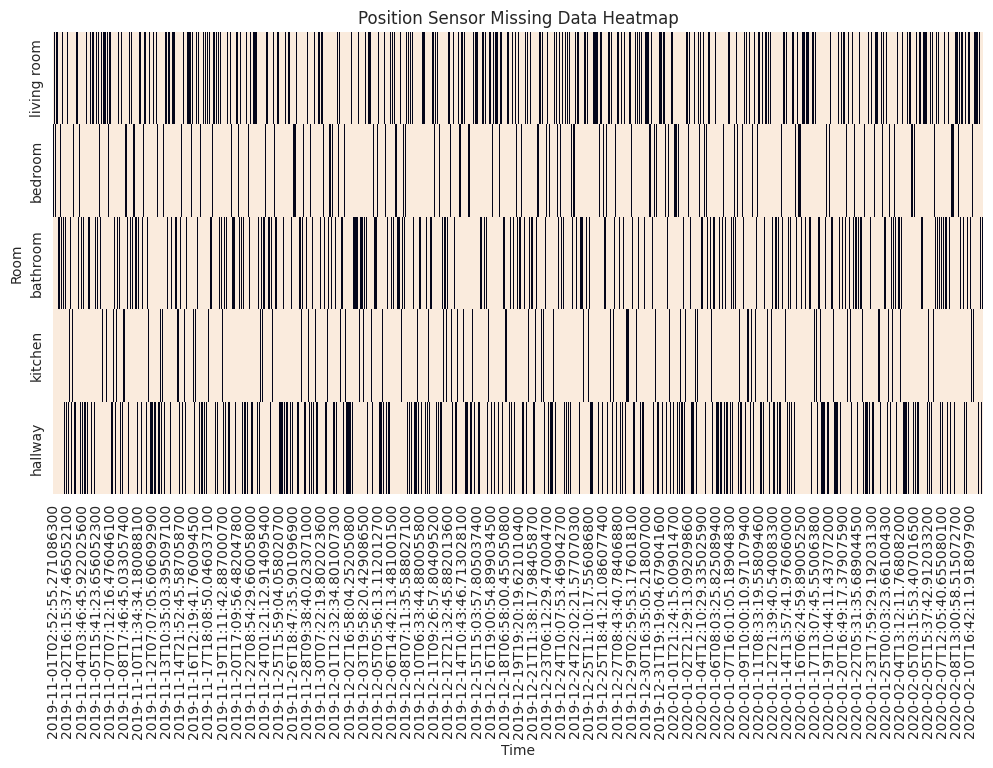

In [163]:
#Heatmap for position sensor missing data
plt.figure(figsize=(12,6))
sns.heatmap(
    pos_df.set_index('datetime').isna().T,
    cbar=False
)
plt.title("Position Sensor Missing Data Heatmap")
plt.xlabel("Time")
plt.ylabel("Room")
plt.show()


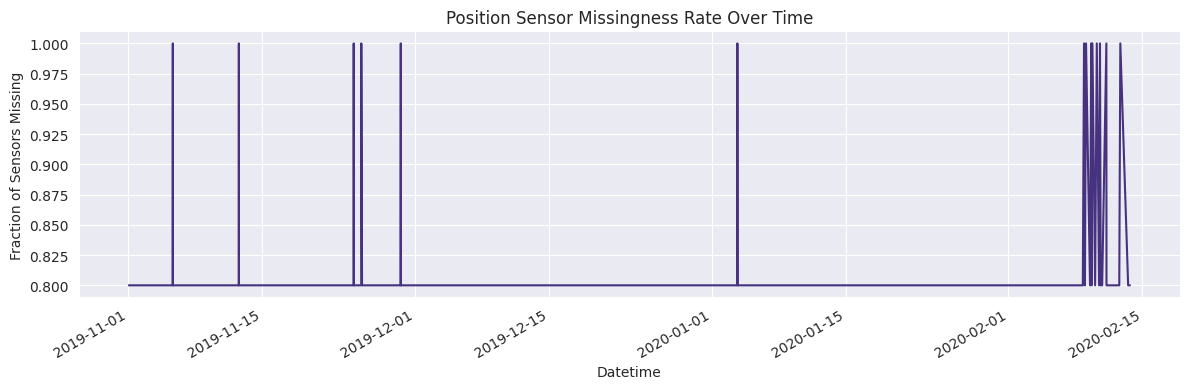

In [164]:
#visualize Position sensor missing data over time
missing_rate = (
    pos_df
    .set_index('datetime')
    .isna()
    .mean(axis=1)
)

plt.figure(figsize=(12, 4))
missing_rate.plot()
plt.title("Position Sensor Missingness Rate Over Time")
plt.ylabel("Fraction of Sensors Missing")
plt.xlabel("Datetime")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Missing Values per Sensor'}>

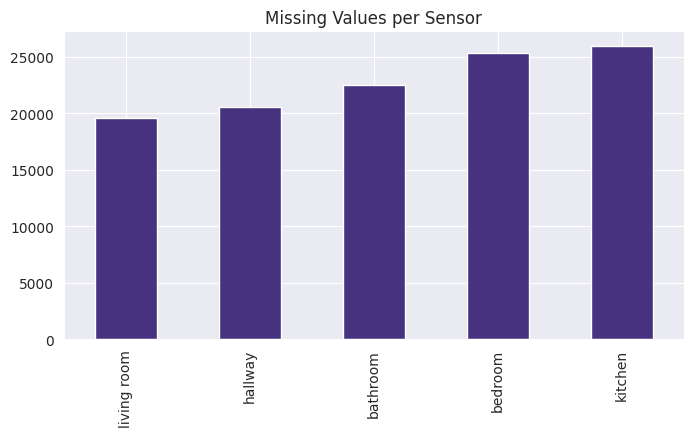

In [165]:
#Missingness per second
(pos_df.isna().sum()
 .drop('datetime')
 .sort_values()
 .plot(kind='bar', figsize=(8,4), title="Missing Values per Sensor"))

#6: Handling Missing Data

In [166]:
room_cols = pos_df.columns.difference(['datetime'])
pos_df[room_cols] = pos_df[room_cols].fillna(0)

In [167]:
pos_df.head()


datetime  living room  bedroom  bathroom  \
0 2019-11-01 02:52:55.271086300+00:00          0.0      0.0       0.0   
1 2019-11-01 03:19:57.417067700+00:00          0.0      1.0       0.0   
2 2019-11-01 03:21:53.257070700+00:00          0.0      0.0       0.0   
3    2019-11-01 05:11:08.874031+00:00          0.0      1.0       0.0   
4 2019-11-01 05:12:38.437033500+00:00          0.0      0.0       0.0   

   kitchen  hallway  
0      0.0      0.0  
1      0.0      0.0  
2      0.0      0.0  
3      0.0      0.0  
4      0.0      0.0

#7: Outlier Cleaning
(This is to identify and remove invalid values)

In [170]:
gas_df.describe()


temperature       humidity  co2cosirvalue  co2mg811value  \
count  416153.000000  416153.000000  416153.000000  416153.000000   
mean       20.115751      52.236446     102.459415     539.086523   
std         2.295836       4.343208      39.026812      34.934361   
min        13.530000      38.160000      21.000000     408.000000   
25%        18.640000      49.050000      76.000000     510.000000   
50%        20.100000      52.310000     105.000000     528.000000   
75%        21.630000      55.640000     117.000000     563.000000   
max        26.140000      69.260000     591.000000     632.000000   

                mox1           mox2           mox3           mox4  \
count  416153.000000  416153.000000  416153.000000  416153.000000   
mean      500.289413     718.708761     672.788842     609.446752   
std        49.795030      31.296907      36.354293      42.703923   
min       262.000000     514.000000     447.000000     355.000000   
25%       468.000000     703.000000     655.000000     587.000000   
50%       502.000000     719.000000     674.000000     611.000000   
75%       536.000000     738.000000     693.000000     635.000000   
max       626.000000     808.000000     777.000000     727.000000   

             covalue  
count  416153.000000  
mean      120.124310  
std        35.992508  
min        74.000000  
25%       103.000000  
50%       113.000000  
75%       128.000000  
max       918.000000

#Compute IQR bounds for co2cosirvalue in the gas dataset(IQR = Interquartile Range)
The outlier reflects a measurement anomaly between its 75th percentile (Q3) and its maximum value, which is far beyond the expected range of the data distribution,

In [171]:
#Compute the IQR upper bound
Q1 = gas_df['co2cosirvalue'].quantile(0.25)
Q3 = gas_df['co2cosirvalue'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR



In [172]:
#Create the outlier flag
gas_df['co2cosir_outlier'] = gas_df['co2cosirvalue'] > upper_bound


In [174]:
#Inspect how many outliers flagged
gas_df['co2cosir_outlier'].value_counts()


co2cosir_outlier
False    408401
True       7752
Name: count, dtype: int64

In [177]:
#Keep them but exclude from model training
train_df = gas_df[~gas_df['co2cosir_outlier']]


In [35]:
pos_df.describe()


living room       bedroom      bathroom       kitchen       hallway
count  28478.000000  28478.000000  28478.000000  28478.000000  28478.000000
mean       0.155488      0.055411      0.104256      0.044210      0.139371
std        0.362376      0.228785      0.305598      0.205564      0.346339
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000      0.000000      0.000000
max        1.000000      1.000000      1.000000      1.000000      1.000000

In [178]:

ref_df.describe()

temperature      humidity  co2cosirvalue  co2mg811value         mox1  \
count  75511.000000  75511.000000   75511.000000   75511.000000  75511.00000   
mean      20.025767     56.690943      70.176226     510.003523    538.73139   
std        1.404978      2.416317      22.969229       9.233296     21.36482   
min       14.820000     46.270000      37.000000     420.000000    339.00000   
25%       19.940000     55.360000      53.000000     502.000000    530.00000   
50%       20.230000     57.030000      69.000000     509.000000    537.00000   
75%       20.640000     58.310000      74.000000     518.000000    545.00000   
max       23.470000     69.260000     198.000000     526.000000    598.00000   

               mox2          mox3          mox4       covalue  
count  75511.000000  75511.000000  75511.000000  75511.000000  
mean     724.035849    675.748619    625.210473    114.237290  
std       19.940654     22.754632     27.964882     21.903941  
min      634.000000    575.000000    473.000000     82.000000  
25%      710.000000    663.000000    611.000000    101.000000  
50%      722.000000    676.000000    626.000000    109.000000  
75%      742.000000    690.000000    643.000000    120.000000  
max      791.000000    734.000000    690.000000    918.000000

#Compute IQR bounds for co2cosirvalue and covalue in the Reference dataset

In [179]:
#First the co2cosirvalue
#Compute the IQR upper bound
Q1 = ref_df['co2cosirvalue'].quantile(0.25)
Q3 = ref_df['co2cosirvalue'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR



In [180]:
#Create the outlier flag
ref_df['co2cosir_outlier'] = gas_df['co2cosirvalue'] > upper_bound

In [181]:
#Inspect how many outliers flagged
ref_df['co2cosir_outlier'].value_counts()


co2cosir_outlier
True     46610
False    28901
Name: count, dtype: int64


#Now Compute IQR bounds for covalue

In [182]:

#Compute the IQR upper bound
Q1 = ref_df['covalue'].quantile(0.25)
Q3 = ref_df['covalue'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

In [183]:
#Create the outlier flag
ref_df['covalue_outlier'] = ref_df['covalue'] > upper_bound

In [43]:
#Inspect how many outliers flagged
ref_df['covalue_outlier'].value_counts()


covalue_outlier
False    67347
True      8164
Name: count, dtype: int64

#8: Cleaning Validation

In [184]:
print(gas_df.info())
print(pos_df.info())
print(ref_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416153 entries, 0 to 416152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   timestamp         416153 non-null  datetime64[ns, UTC]
 1   temperature       416153 non-null  float64            
 2   humidity          416153 non-null  float64            
 3   co2cosirvalue     416153 non-null  float64            
 4   co2mg811value     416153 non-null  float64            
 5   mox1              416153 non-null  float64            
 6   mox2              416153 non-null  float64            
 7   mox3              416153 non-null  float64            
 8   mox4              416153 non-null  float64            
 9   covalue           416153 non-null  float64            
 10  co2cosir_outlier  416153 non-null  bool               
dtypes: bool(1), datetime64[ns, UTC](1), float64(9)
memory usage: 32.1 MB
None
<class 'pandas.core.frame.Data

#9: Gas Data Analysis

#9.1 Visual Distribution of gas usage values

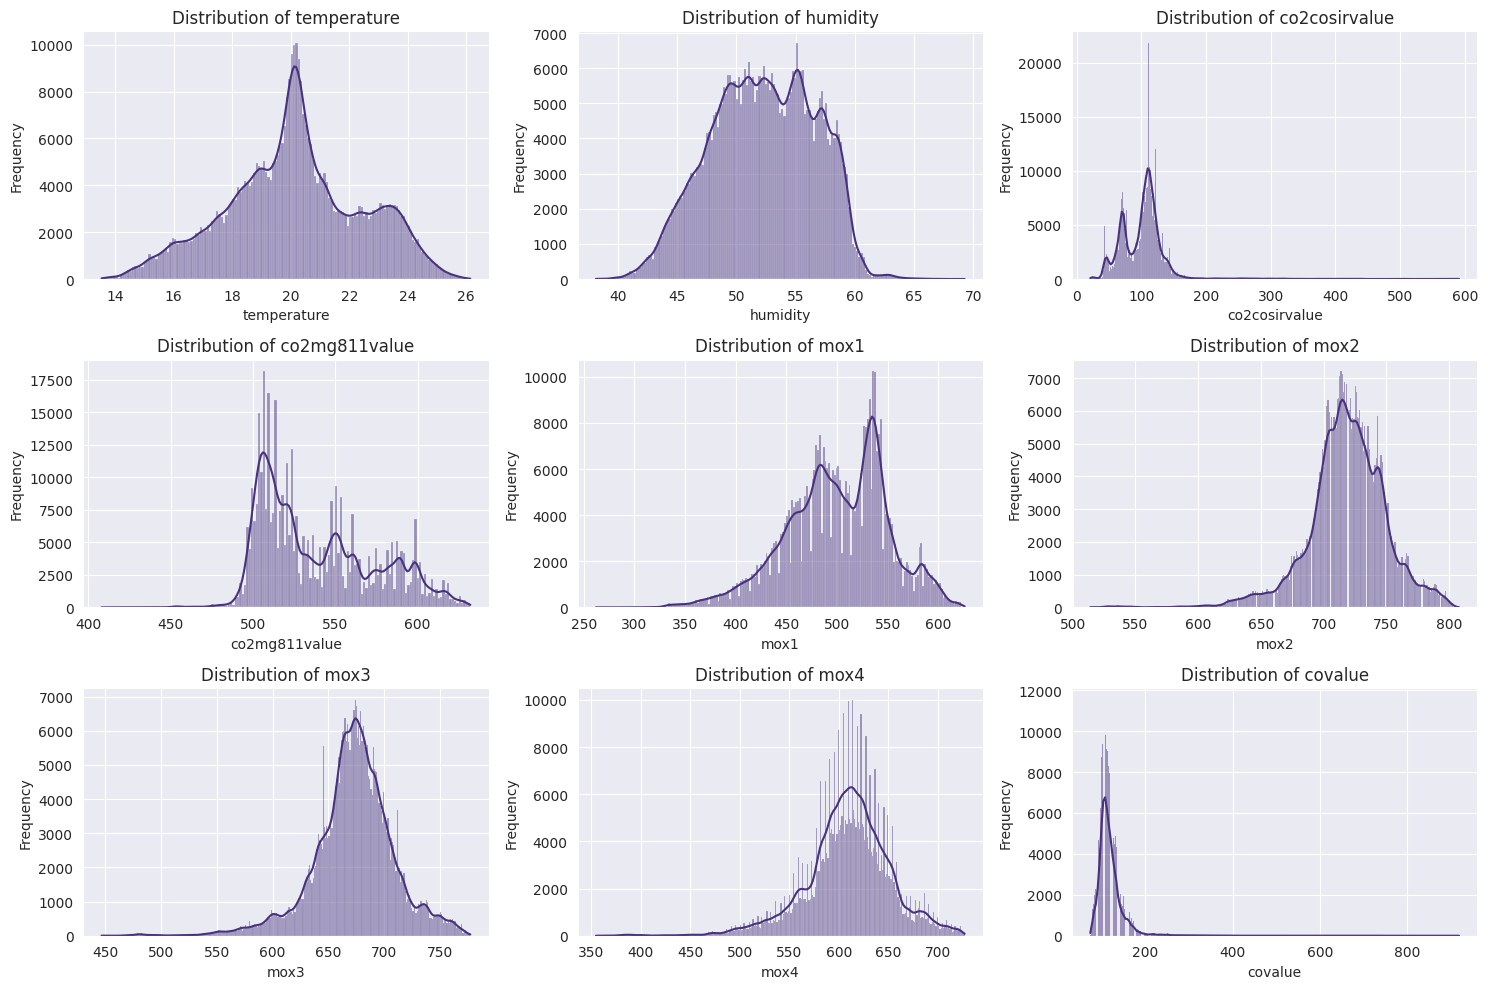

In [185]:

# Exclude the 'timestamp' column as it's a datetime object
numerical_cols = gas_df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid as needed
    sns.histplot(gas_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#9.2: Time-series line plot (usage over time)

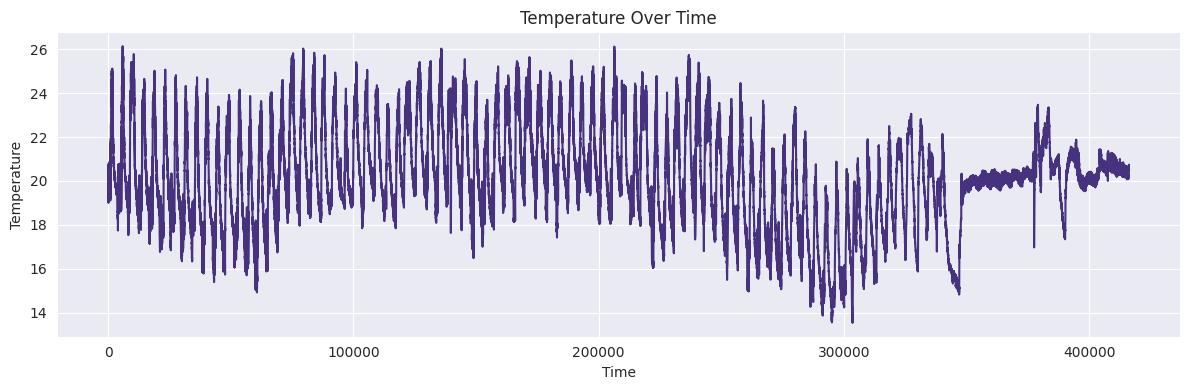

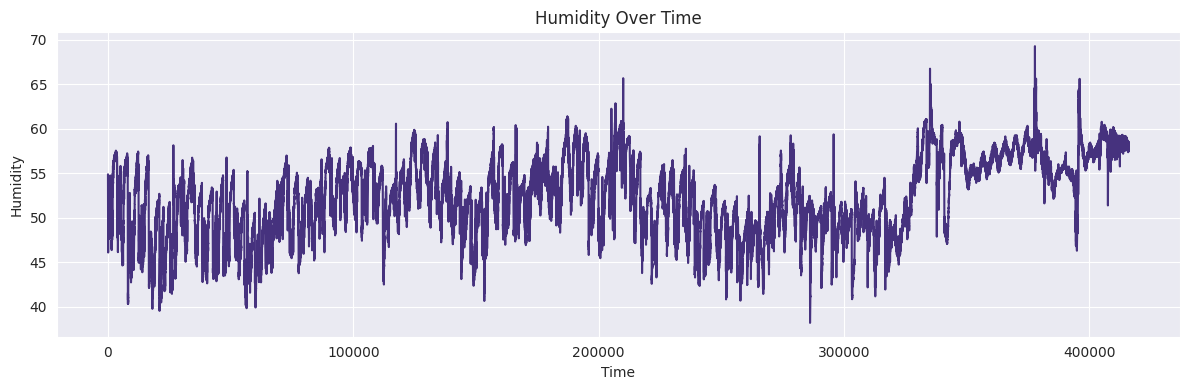

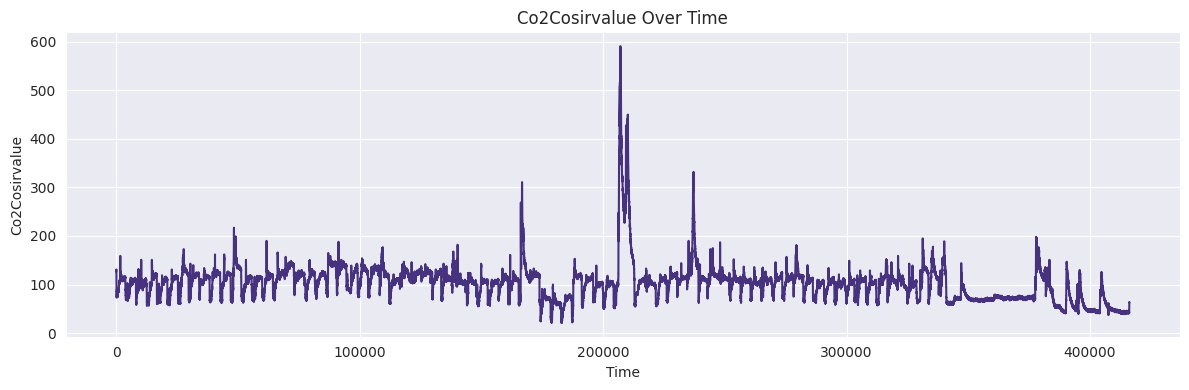

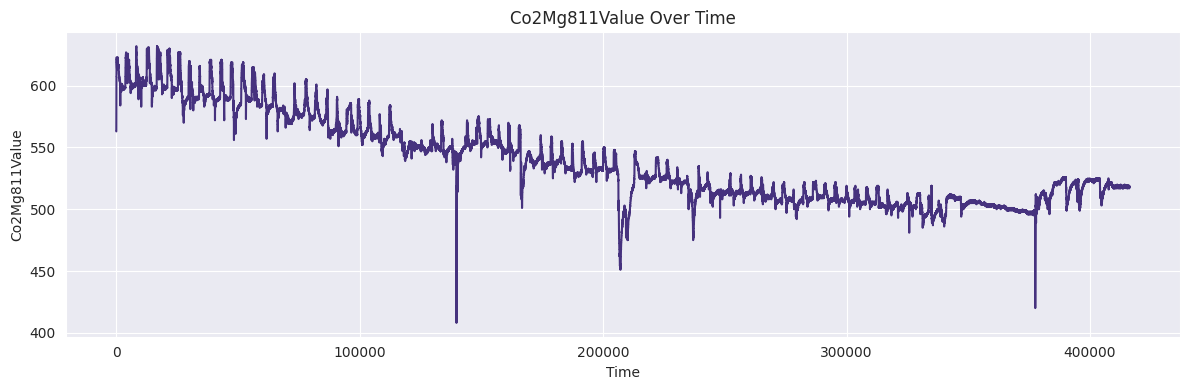

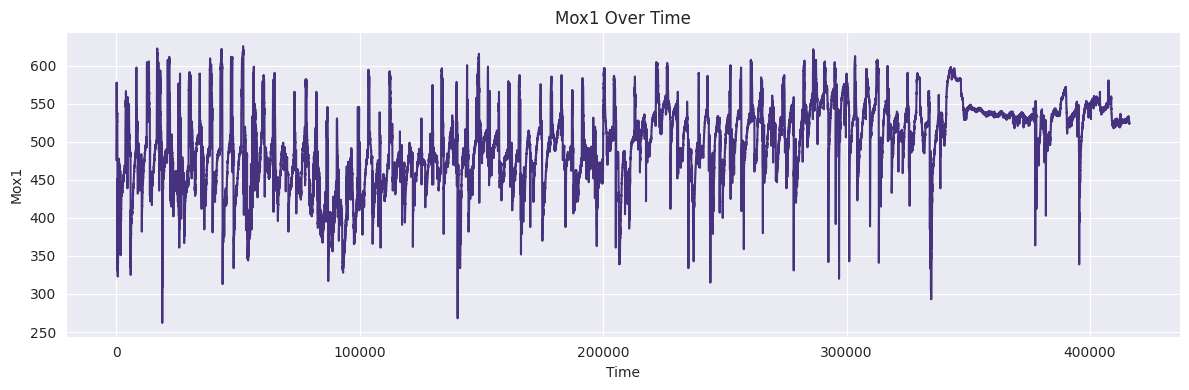

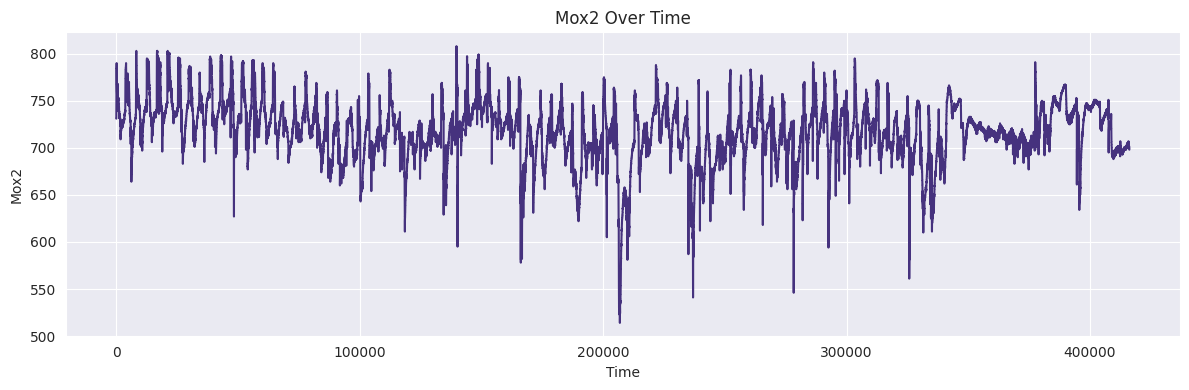

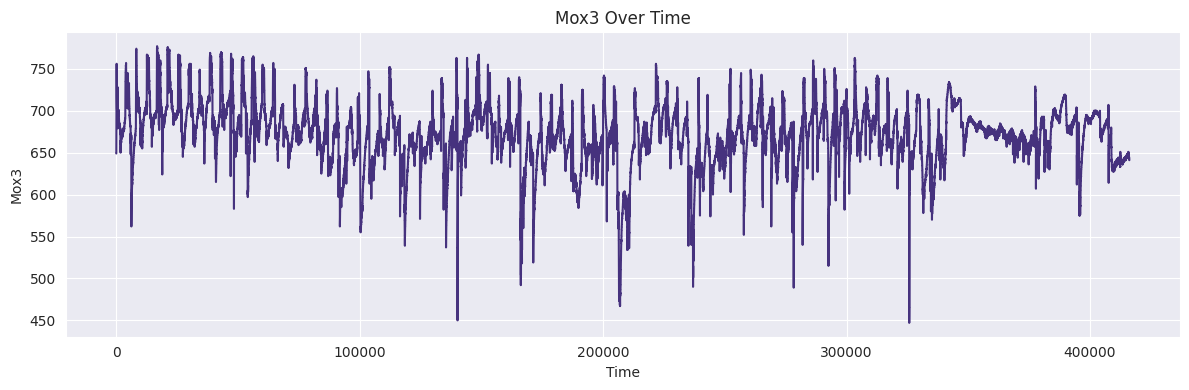

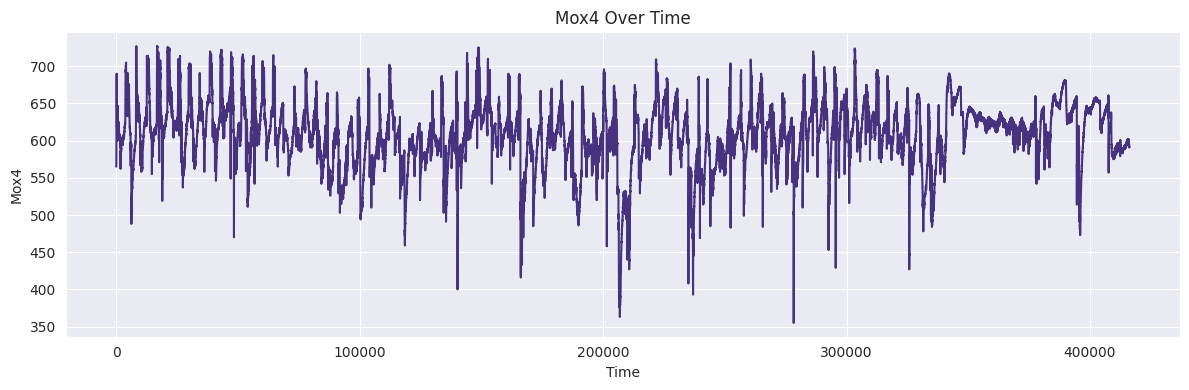

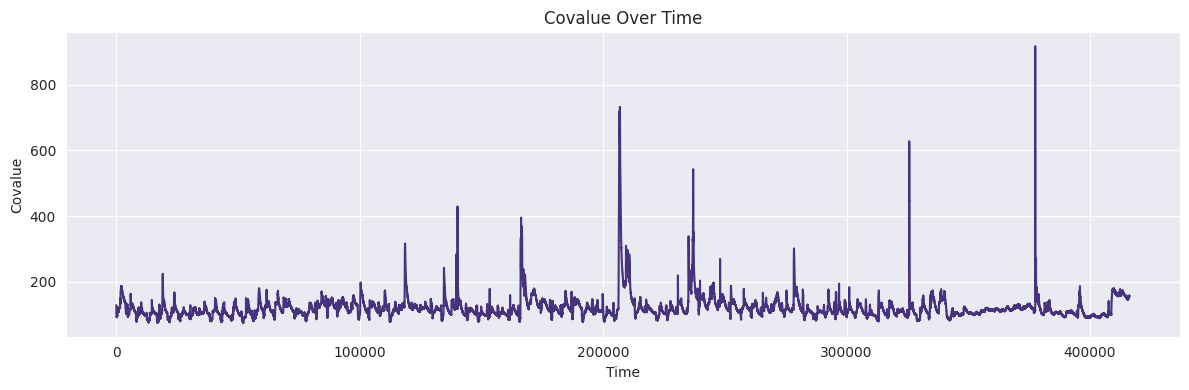

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = gas_df.select_dtypes(include=np.number).columns

# Create a plot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(12, 4))
    sns.lineplot(x=gas_df.index, y=gas_df[col])
    plt.title(f'{col.replace("_", " ").title()} Over Time')
    plt.xlabel("Time")
    plt.ylabel(col.replace("_", " ").title())
    plt.tight_layout()
    plt.show()

#9.3 Frequency of gas activation events

This helps understand:

 whether a simple domain-based threshold is meaningful

 whether the signal has a natural ON/OFF behavior

 whether “activation frequency” is a valid metric at all

 whether the sensor behaves as a continuous signal

In [187]:
numerical_gas_cols = gas_df.select_dtypes(include=np.number).columns

print("Frequency of gas activation events for each gas column:")

for col in numerical_gas_cols:
    if col == 'timestamp':
        continue

    # Define activation threshold
    active = gas_df[col] > 0

    # Detect OFF → ON transitions (activation events)
    activation_events = active & (~active.shift(fill_value=False))

    print(f"\n--- {col.replace('_', ' ').title()} Activation Events ---")
    print(f"Number of activation events: {activation_events.sum()}")



Frequency of gas activation events for each gas column:

--- Temperature Activation Events ---
Number of activation events: 1

--- Humidity Activation Events ---
Number of activation events: 1

--- Co2Cosirvalue Activation Events ---
Number of activation events: 1

--- Co2Mg811Value Activation Events ---
Number of activation events: 1

--- Mox1 Activation Events ---
Number of activation events: 1

--- Mox2 Activation Events ---
Number of activation events: 1

--- Mox3 Activation Events ---
Number of activation events: 1

--- Mox4 Activation Events ---
Number of activation events: 1

--- Covalue Activation Events ---
Number of activation events: 1


#9.4: Period Of sensor detection


This tells when the sensors detected temperature or gas

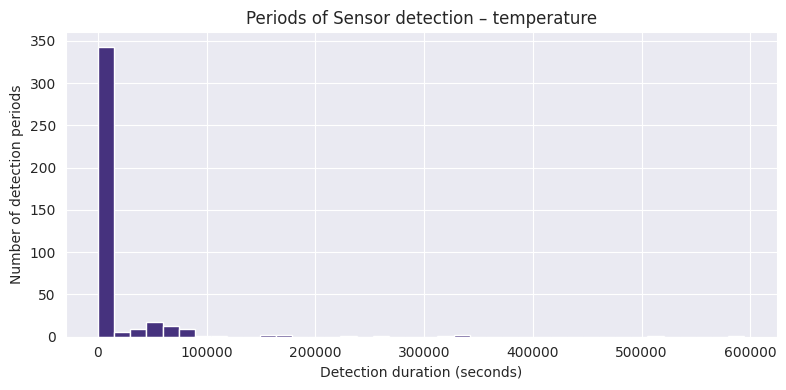

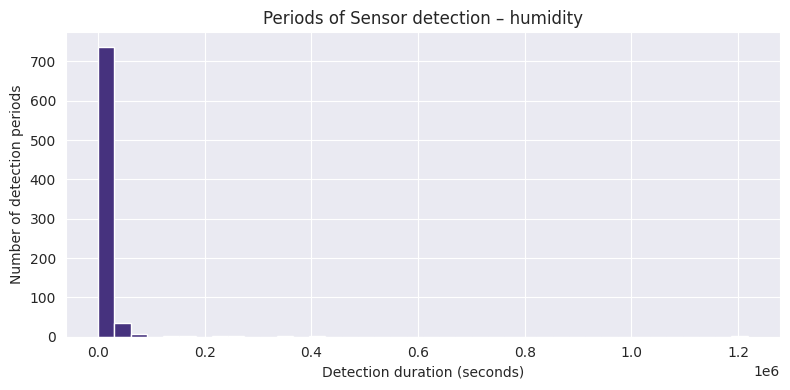

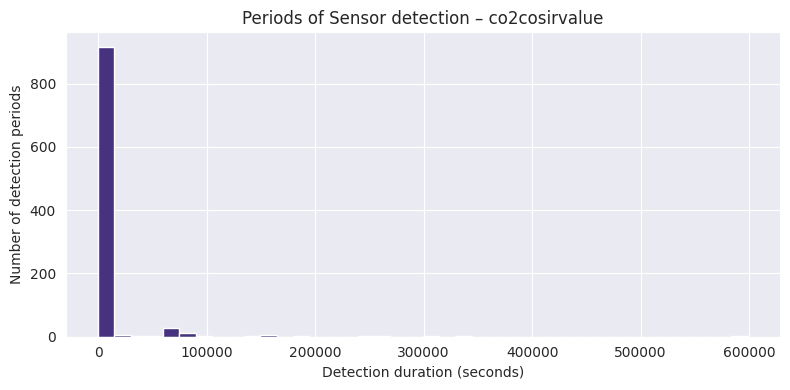

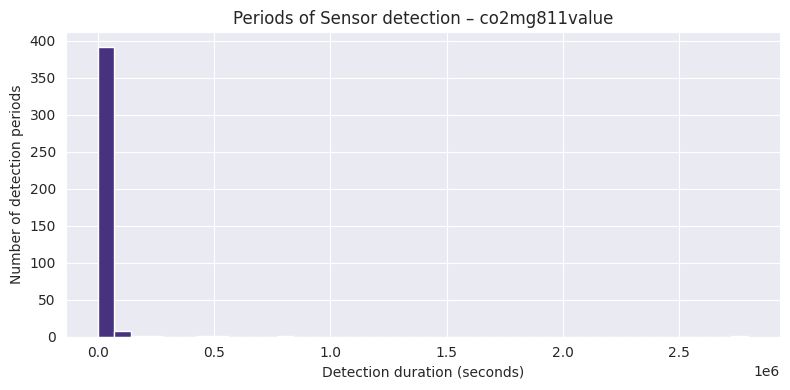

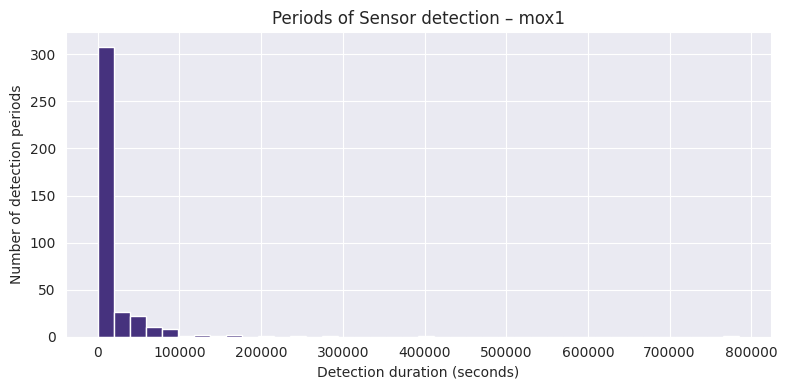

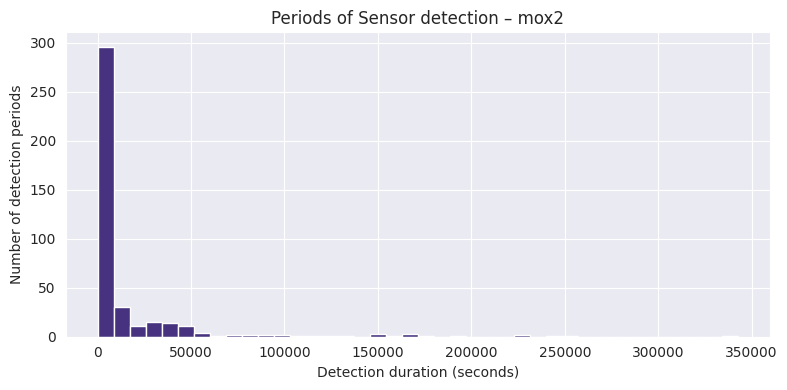

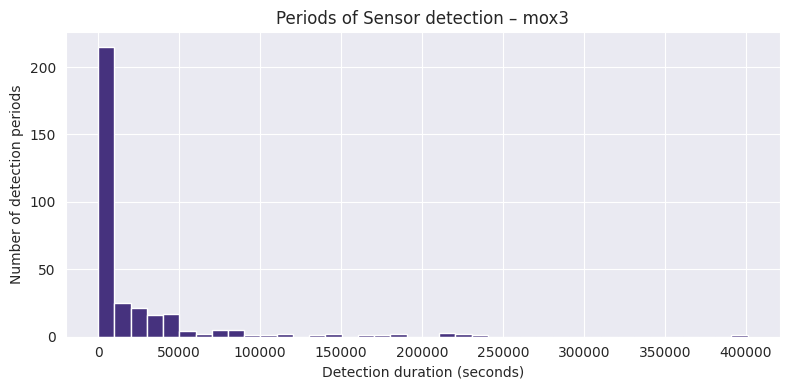

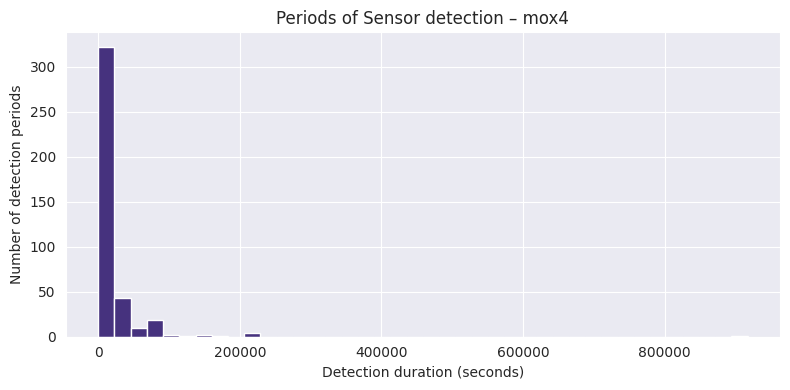

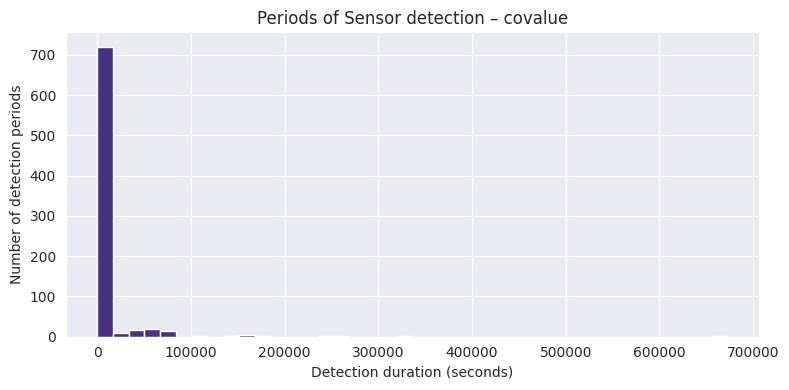

In [192]:
numerical_gas_cols = gas_df.select_dtypes(include=np.number).columns

gas_detection_summary = {}

for col in numerical_gas_cols:
    if col == 'timestamp':
        continue

    # Define sensor-specific detection threshold
    threshold = gas_df[col].quantile(0.20) #The 20th percentile threshold is used to identify periods of elevated sensor readings relative to normal background levels.

    # Gas detected
    gas_detected = gas_df[col] > threshold

    # Identify state changes
    state_change = gas_detected != gas_detected.shift()

    # Assign detection blocks
    detection_block = state_change.cumsum()

    # Group continuous detection periods
    detected_blocks = gas_df[gas_detected].groupby(detection_block)

    # Compute duration in seconds
    detection_durations = detected_blocks['timestamp'].agg(
        lambda x: (x.max() - x.min()).total_seconds()
    )

 # Visualization of gas detection durations for each sensor

    plt.figure(figsize=(8, 4))
    plt.hist(detection_durations, bins=40)
    plt.xlabel("Detection duration (seconds)")
    plt.ylabel("Number of detection periods")
    plt.title(f"Periods of Sensor detection – {col}")
    plt.tight_layout()
    plt.show()


In [193]:
gas_detection_df = pd.DataFrame(gas_detection_summary).T
gas_detection_df


Empty DataFrame
Columns: []
Index: []

#10: Position Data Analysis.

#10.1: Movement Frequency
This check on how often position change occur to help identify

activity level

mobility patterns

routine vs irregular behavior

In [194]:
pos_df['datetime'] = pd.to_datetime(pos_df['datetime'])

movement_frequency = {}

for col in pos_df.columns:
    if col == 'datetime':
        continue

    movement_events = (pos_df[col] != pos_df[col].shift()).sum()
    movement_frequency[col] = movement_events

movement_frequency = pd.Series(movement_frequency, name='movement_events')
movement_frequency

living room    8853
bedroom        3157
bathroom       5937
kitchen        2519
hallway        7937
Name: movement_events, dtype: int64

/tmp/ipython-input-170643466.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movement_frequency.index, y=movement_frequency.values, palette='viridis')


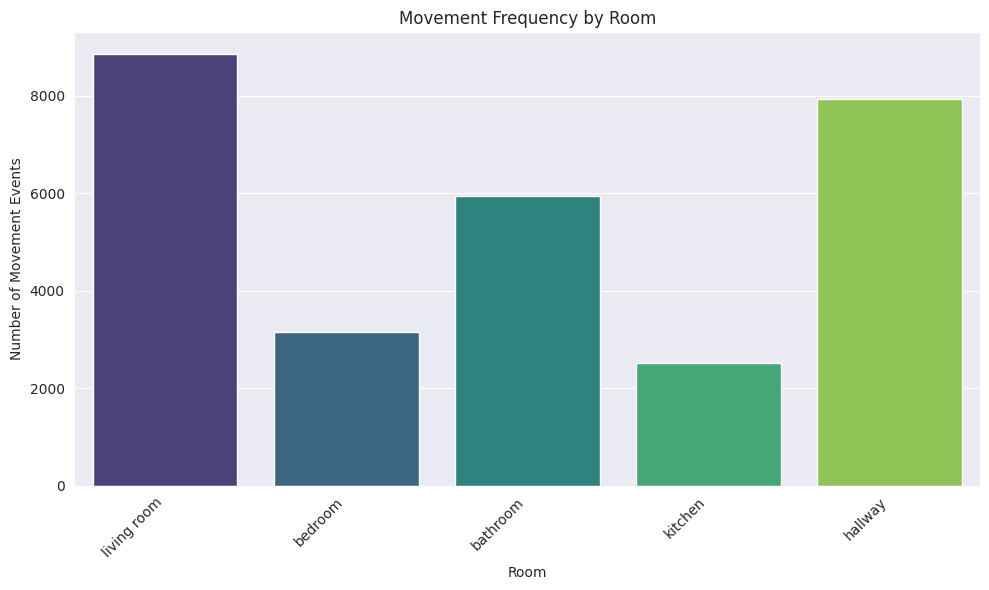

In [195]:
#Visualizing Movement Frequency by rooms
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=movement_frequency.index, y=movement_frequency.values, palette='viridis')
plt.title('Movement Frequency by Room')
plt.xlabel('Room')
plt.ylabel('Number of Movement Events')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#10.2 Daily Activity Patterns

This is to check when movement typically occurs, so as to understand

routines (morning/evening activity)

night-time inactivity

lifestyle structure

In [196]:
pos_df['hour'] = pos_df['datetime'].dt.hour

hourly_activity = {}

for col in pos_df.columns:
    if col in ['datetime', 'hour']:
        continue

    hourly_activity[col] = pos_df.groupby('hour')[col].sum()

hourly_activity_df = pd.DataFrame(hourly_activity)
hourly_activity_df


living room  bedroom  bathroom  kitchen  hallway
hour                                                  
0            55.0     77.0      28.0      9.0     33.0
1            51.0     88.0      19.0      3.0     28.0
2            23.0     84.0      17.0      0.0     14.0
3            30.0    104.0      24.0      0.0     24.0
4            17.0    103.0      16.0      0.0     21.0
5            29.0    122.0      41.0      0.0     32.0
6            72.0    156.0      97.0      2.0     69.0
7           316.0    127.0     335.0     13.0    310.0
8           201.0     16.0     110.0     55.0    194.0
9           264.0     43.0     149.0     60.0    249.0
10          264.0     56.0     166.0     75.0    236.0
11          323.0     71.0     184.0    148.0    306.0
12          361.0     29.0     181.0    181.0    292.0
13          244.0     14.0     123.0    150.0    189.0
14          322.0     56.0     155.0     57.0    264.0
15          297.0     33.0     189.0     58.0    282.0
16          241.0     36.0     138.0     33.0    200.0
17          217.0     18.0     110.0     80.0    200.0
18          229.0     23.0     118.0     99.0    199.0
19          223.0     15.0     114.0    127.0    195.0
20          209.0     40.0     131.0     71.0    193.0
21          290.0    163.0     401.0     33.0    311.0
22           98.0     77.0     110.0      2.0    105.0
23           52.0     27.0      13.0      3.0     23.0

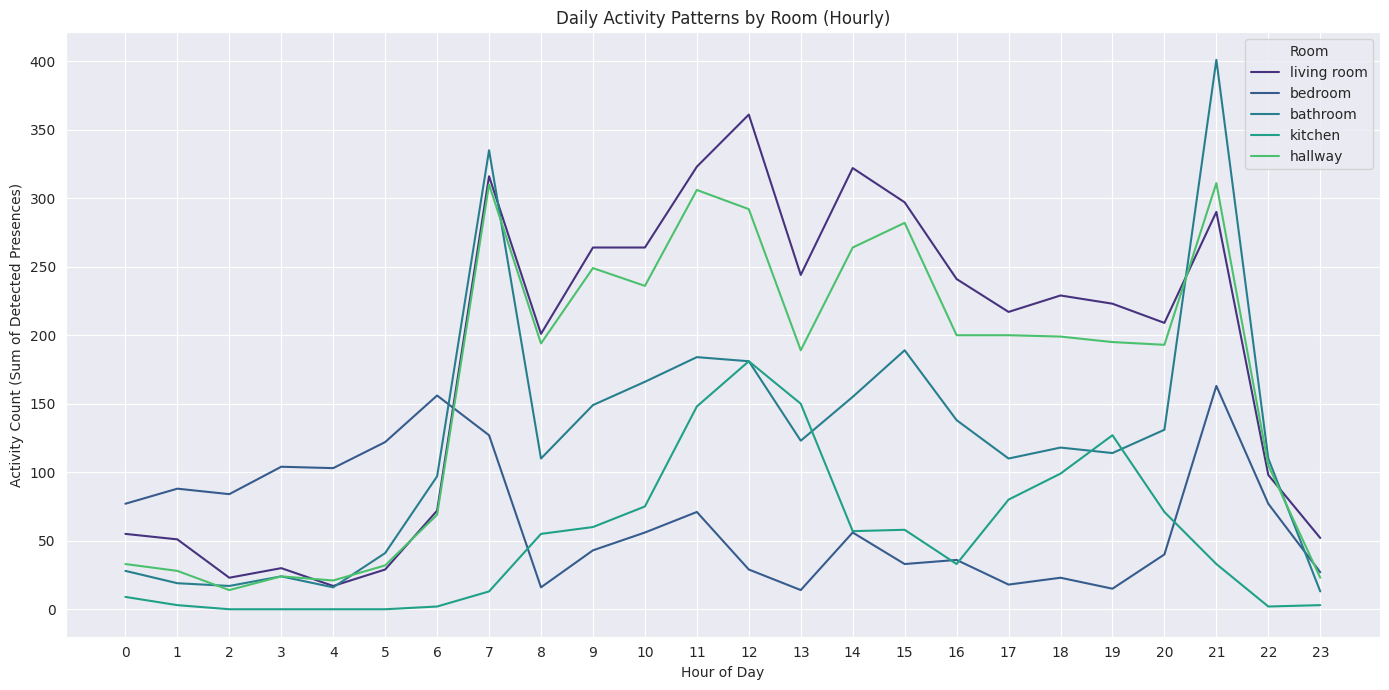

In [197]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=hourly_activity_df, dashes=False)
plt.title('Daily Activity Patterns by Room (Hourly)')
plt.xlabel('Hour of Day')
plt.ylabel('Activity Count (Sum of Detected Presences)')
plt.xticks(range(0, 24)) # Ensure all hours are displayed
plt.grid(True)
plt.legend(title='Room')
plt.tight_layout()
plt.show()

#10.3 Time-Series Movement Plots

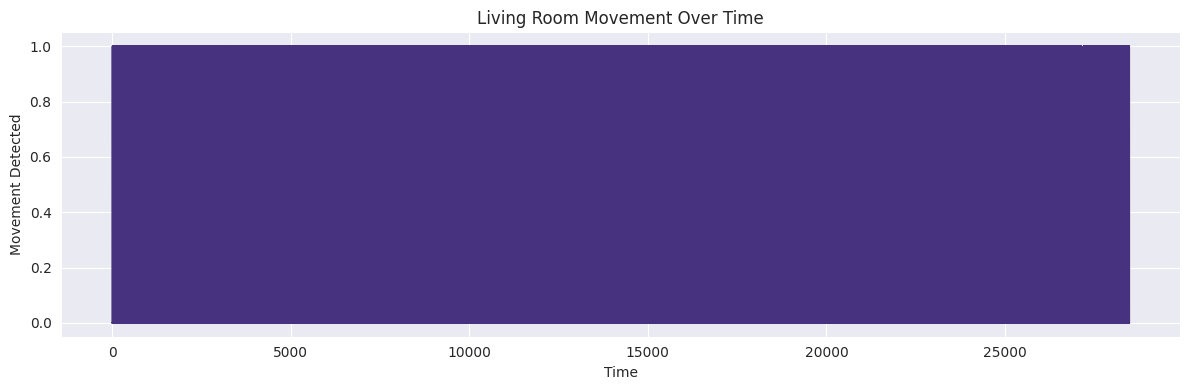

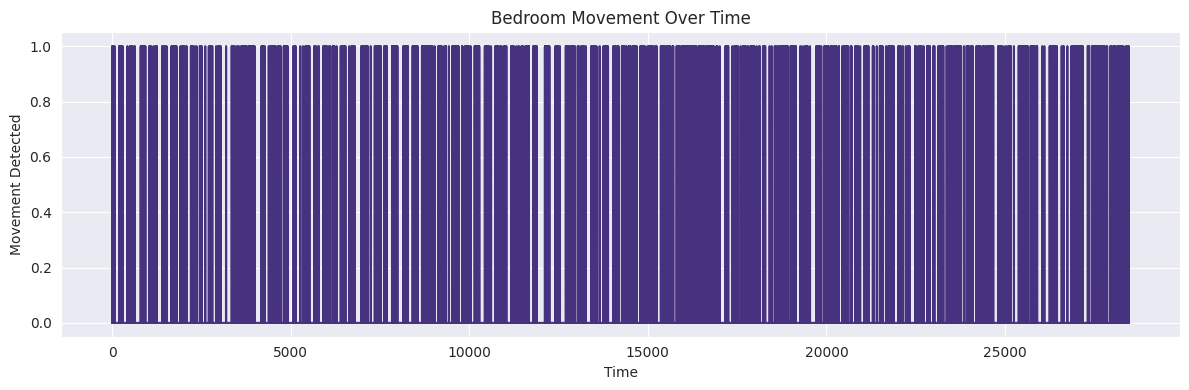

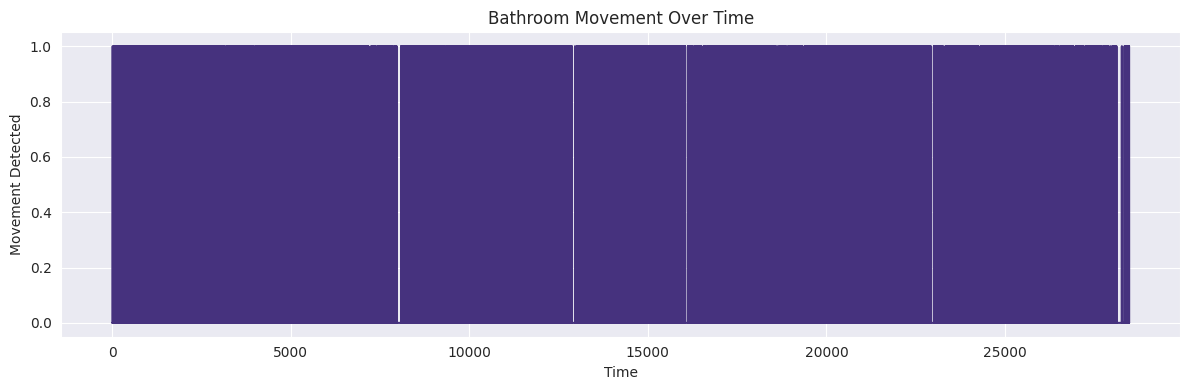

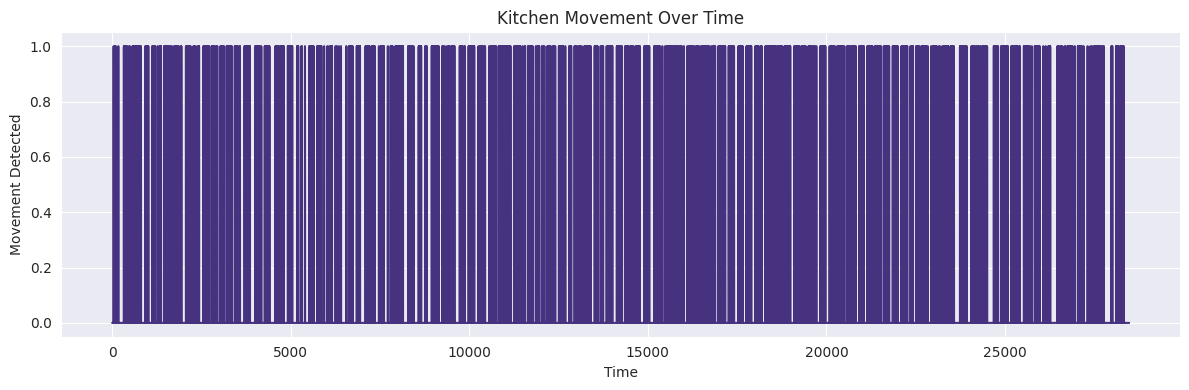

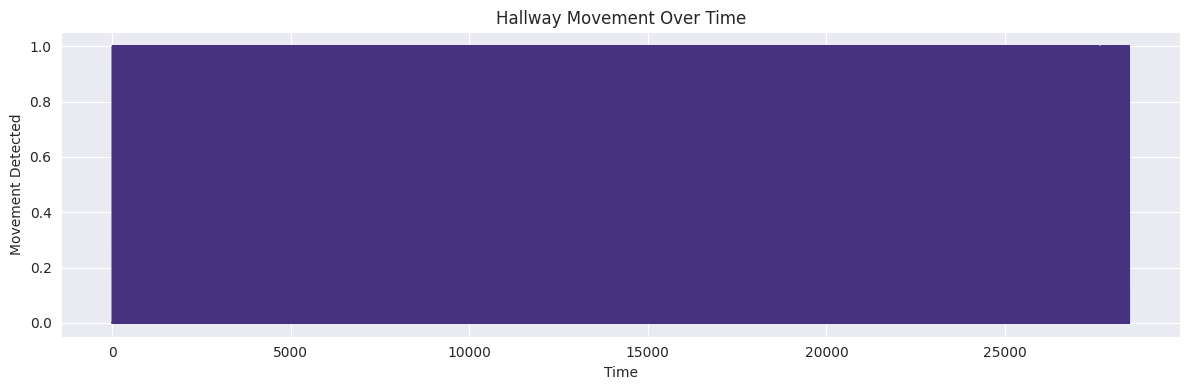

In [198]:


# Define room columns to plot, excluding non-numeric or grouping columns
room_cols = ['living room', 'bedroom', 'bathroom', 'kitchen', 'hallway']

for col in room_cols:
    plt.figure(figsize=(12,4))
    pos_df[col].plot()
    plt.title(f"{col.replace('_', ' ').title()} Movement Over Time")
    plt.xlabel("Time")
    plt.ylabel("Movement Detected")
    plt.ylim(-0.05, 1.05)
    plt.tight_layout()
    plt.show()

#10.4 Heatmap of Movement Frequency

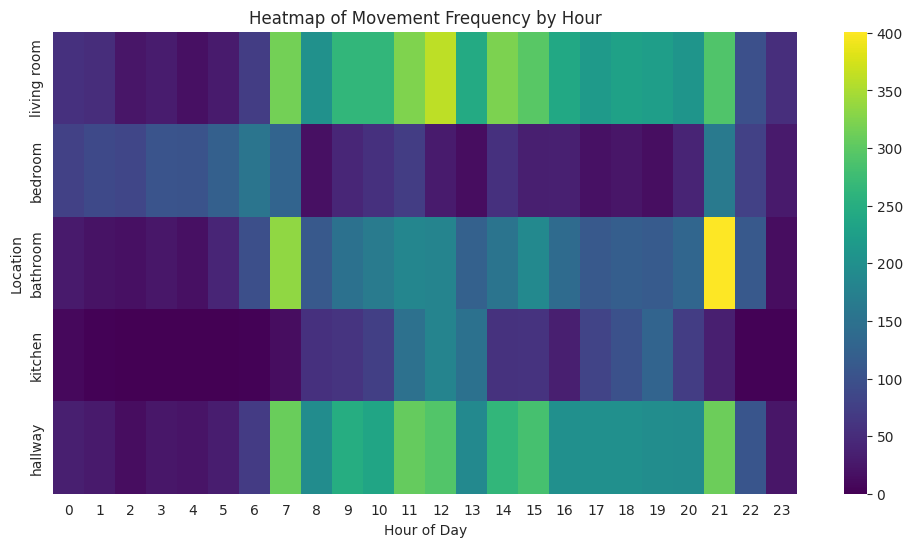

In [199]:

plt.figure(figsize=(12,6))
sns.heatmap(hourly_activity_df.T, cmap='viridis')
plt.xlabel("Hour of Day")
plt.ylabel("Location")
plt.title("Heatmap of Movement Frequency by Hour")
plt.show()



#10.5 Period of Inactivity

In [200]:
position_cols = ['living room', 'bedroom', 'bathroom', 'kitchen', 'hallway']

# Define 'is_inactive_overall' as True if all room sensors are 0
pos_df['is_inactive_overall'] = (pos_df[position_cols] == 0).all(axis=1)

print(pos_df['is_inactive_overall'].value_counts())

is_inactive_overall
True     14275
False    14203
Name: count, dtype: int64


In [202]:
# Group consecutive periods where 'is_inactive_overall' is True
pos_df['inactivity_group'] = (
    pos_df['is_inactive_overall']
    .ne(pos_df['is_inactive_overall'].shift())
    .cumsum()
)

In [203]:
inactivity_periods = (
    pos_df[pos_df['is_inactive_overall']] # Filter for overall inactive periods
    .groupby('inactivity_group')
    .agg(
        start_time=('datetime', 'min'),
        end_time=('datetime', 'max')
    )
)

inactivity_periods['duration_minutes'] = (
    inactivity_periods['end_time'] - inactivity_periods['start_time']
).dt.total_seconds() / 60

In [204]:
long_inactivity = inactivity_periods[inactivity_periods['duration_minutes'] > 30]

inactivity_summary = {
    "total_inactivity_periods": len(inactivity_periods),
    "extended_inactivity_periods": len(long_inactivity),
    "max_inactivity_minutes": inactivity_periods['duration_minutes'].max(),
    "average_inactivity_minutes": inactivity_periods['duration_minutes'].mean()
}

inactivity_summary

{'total_inactivity_periods': 7079,
 'extended_inactivity_periods': 11,
 'max_inactivity_minutes': 2587.300299425,
 'average_inactivity_minutes': np.float64(1.2238881428415032)}

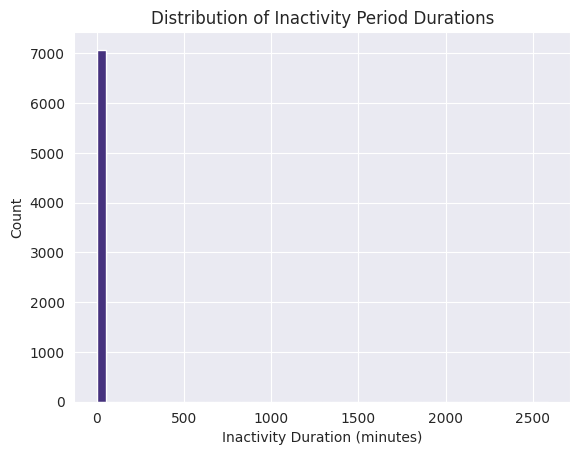

In [205]:
#Visualization of inactive period
plt.figure()
plt.hist(inactivity_periods['duration_minutes'], bins=50)
plt.xlabel('Inactivity Duration (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Inactivity Period Durations')
plt.show()


#11: Reference Data Analysis
  This is to:
   
Verify sensor IDs

Confirm mappings used in gas/position datasets

Ensure no missing or inconsistent identifiers

#11.1 Confirm position dataset mappings exist in reference

In [206]:
#Check on reference mapping names
print("Position dataset columns:")
for col in pos_df.columns:
    print(f"- '{col}'")


Position dataset columns:
- 'datetime'
- 'living room'
- 'bedroom'
- 'bathroom'
- 'kitchen'
- 'hallway'
- 'hour'
- 'is_inactive_overall'
- 'inactivity_group'


In [207]:
# Reference mapping: sensor column -> semantic location
position_reference = {
    'Living room': 'Living Room',
    'Bedroom': 'Bedroom',
    'Bathroom': 'Bathroom',
    'Kitchen': 'Kitchen',
    'Hallway': 'Hallway'
}



In [209]:
# Exclude datetime column
position_columns = [c for c in pos_df.columns if c != 'datetime']



In [210]:
#Check for missing mappings
missing_in_data = set(position_reference.keys()) - set(position_columns)

if missing_in_data:
    print(" Missing position columns in dataset:")
    for col in missing_in_data:
        print(f" - {col}")
else:
    print(" All reference position mappings exist in the dataset.")


 Missing position columns in dataset:
 - Kitchen
 - Hallway
 - Bathroom
 - Bedroom
 - Living room


In [211]:
#Check for unmapped columns

unexpected_columns = set(position_columns) - set(position_reference.keys())

if unexpected_columns:
    print(" Unmapped position columns found:")
    for col in unexpected_columns:
        print(f" - {col}")
else:
    print("No unexpected position columns found.")


 Unmapped position columns found:
 - kitchen
 - living room
 - bathroom
 - is_inactive_overall
 - hallway
 - inactivity_group
 - hour
 - bedroom


In [212]:
print("\n Position Mapping Validation Summary")
print(f"Expected positions : {len(position_reference)}")
print(f"Found positions    : {len(position_columns)}")
print(f"Missing mappings   : {len(missing_in_data)}")
print(f"Extra columns      : {len(unexpected_columns)}")


 Position Mapping Validation Summary
Expected positions : 5
Found positions    : 8
Missing mappings   : 5
Extra columns      : 8


#12 Time-Based Aggregation & Smoothing
The Time-based aggregation:

reduces high-frequency noise

reveals hourly and daily patterns

makes trends easier to interpret

In [214]:
#Set time as index
gas_ts = gas_df.set_index('timestamp').sort_index()


In [84]:
# Gas sensors
gas_cols = [
    'co2cosirvalue',
    'co2mg811value',
    'mox1', 'mox2', 'mox3', 'mox4',
    'covalue'
]

In [215]:
#Hourly Aggregation to reduces high-frequency noise and reveals hourly patterns
hourly_gas = gas_ts[gas_cols].resample('h').mean()



In [217]:
#Daily Aggregation
daily_gas = gas_ts[gas_cols].resample('D').mean()



In [87]:
#30-minute rolling average
for col in gas_cols:
    gas_ts[f'{col}_30min_smooth'] = gas_ts[col].rolling('30min').mean()


In [218]:
#1hour Rolling Average
for col in gas_cols:
    gas_ts[f'{col}_1h_smooth'] = gas_ts[col].rolling('1h').mean()


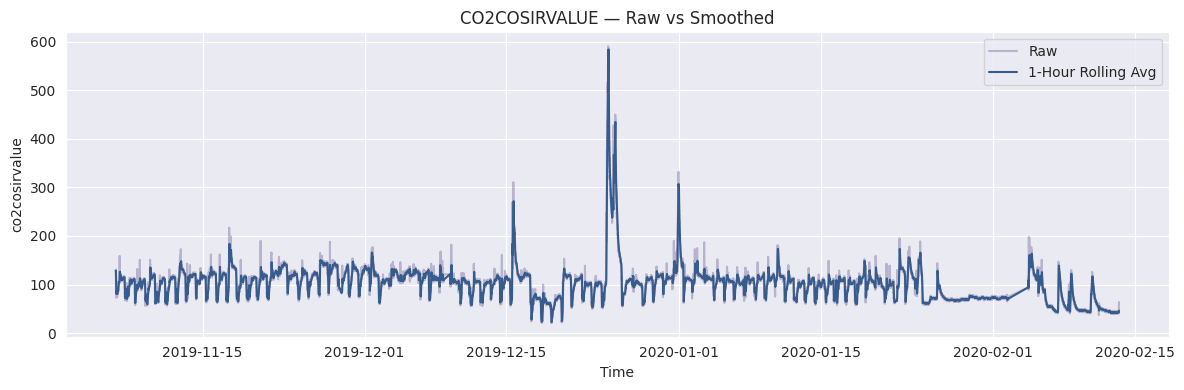

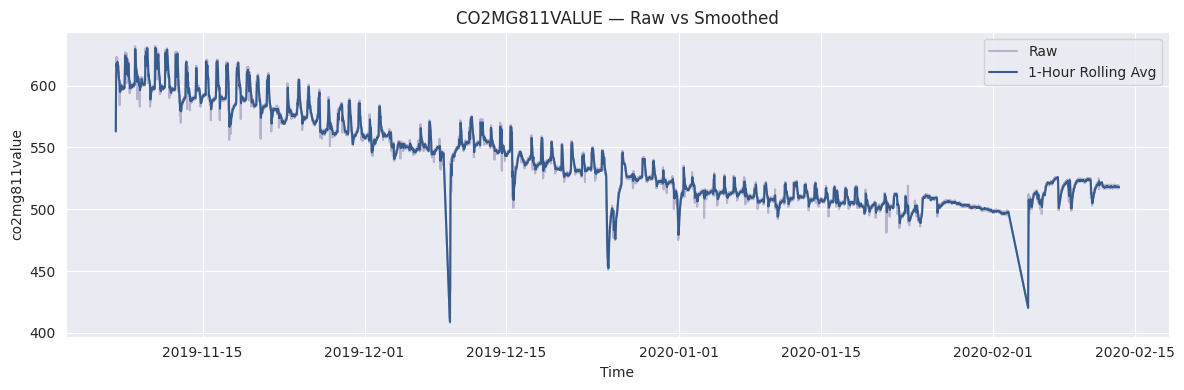

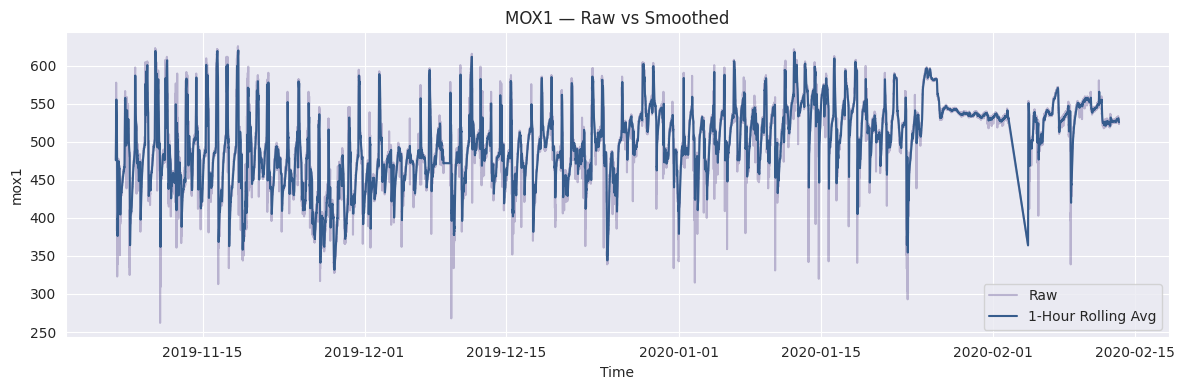

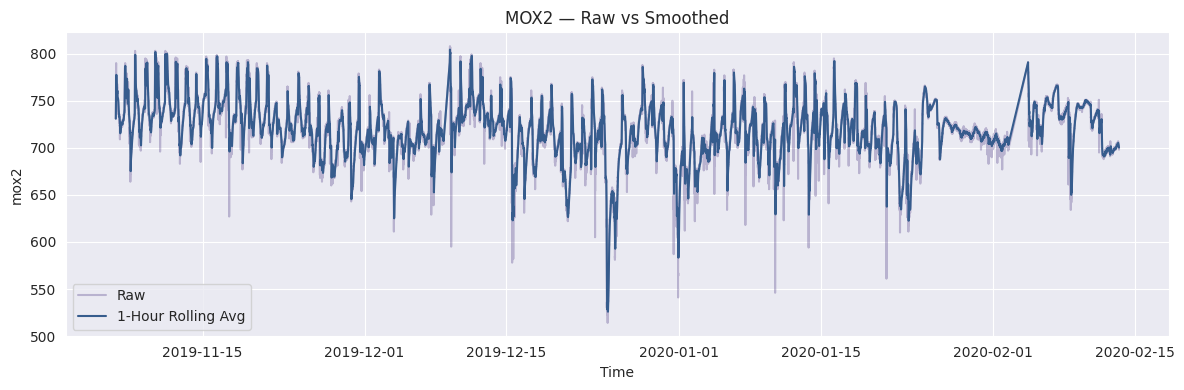

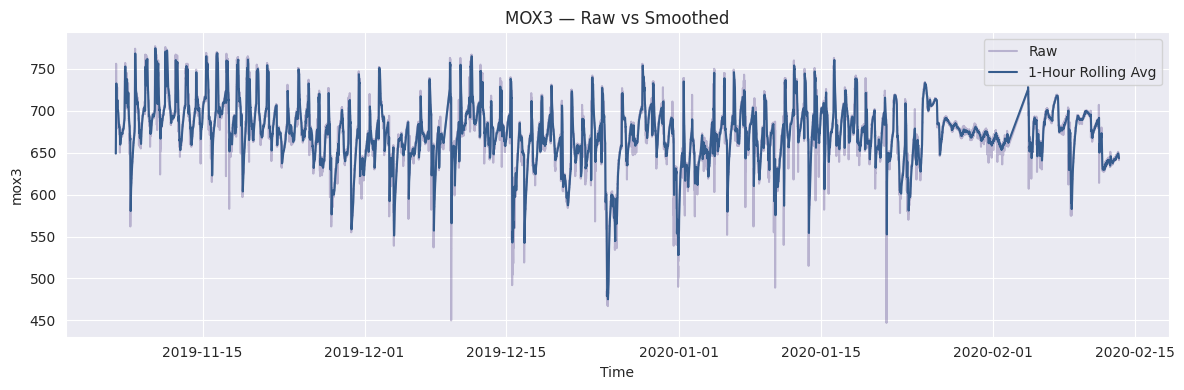

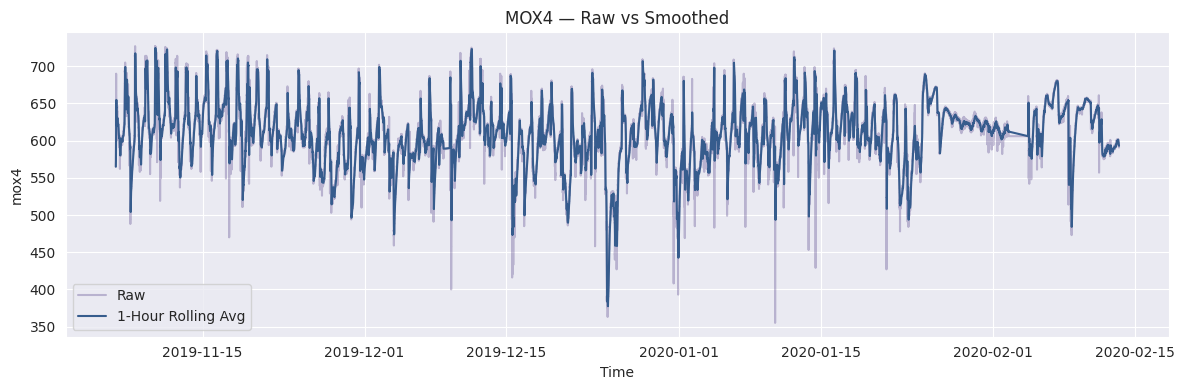

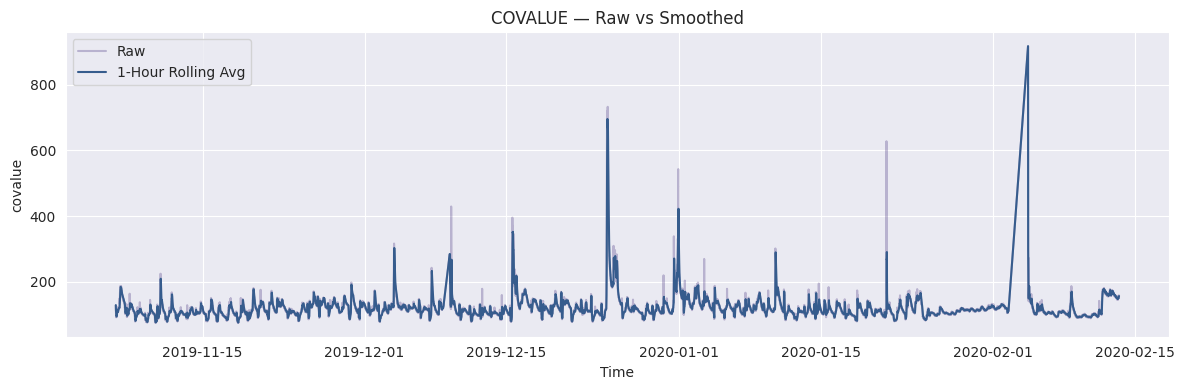

In [219]:
#Visualization

for col in gas_cols:
    plt.figure(figsize=(12, 4))
    plt.plot(gas_ts[col], alpha=0.3, label='Raw')
    plt.plot(gas_ts[f'{col}_1h_smooth'], label='1-Hour Rolling Avg')
    plt.title(f'{col.upper()} — Raw vs Smoothed')
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()


#13: Cross-Dataset (Gas + Environmental + Position)
This is to uncover context-aware, safety-critical patterns that cannot be identified through single-sensor analysis.

#13.1 Dataset Merging

To enable cross-sensor analysis, the following datasets are merged:

Gas sensor data (e.g., CO, MOX)

Environmental data (temperature and humidity)

Position / motion sensor data

In [220]:
# Standardize timestamp column name for merging
pos_df = pos_df.rename(columns={'datetime': 'timestamp'})


In [221]:
#Aggregate position data to match gas resolution
room_cols = ['living room', 'bedroom', 'bathroom', 'kitchen', 'hallway']

pos_hourly = (
    pos_df
    .set_index('timestamp')[room_cols]
    .resample('h')
    .sum()
    .reset_index()
)

# Total movement per hour
pos_hourly['movement'] = pos_hourly[room_cols].sum(axis=1)


In [224]:
#Aggregate gas + environmental data to hourly resolution
gas_cols = [
    'co2cosirvalue',
    'co2mg811value',
    'mox1', 'mox2', 'mox3', 'mox4',
    'covalue',
    'temperature',
    'humidity'
]

gas_hourly = (
    gas_df
    .set_index('timestamp')[gas_cols]
    .resample('h')
    .mean()
    .reset_index()
)


In [225]:
#Merge gas, environmental, and position data
merged_df = pd.merge(
    gas_hourly,
    pos_hourly[['timestamp', 'movement']],
    on='timestamp',
    how='inner'
)


In [226]:
merged_df.info()
merged_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2377 entries, 0 to 2376
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   timestamp      2377 non-null   datetime64[ns, UTC]
 1   co2cosirvalue  2319 non-null   float64            
 2   co2mg811value  2319 non-null   float64            
 3   mox1           2319 non-null   float64            
 4   mox2           2319 non-null   float64            
 5   mox3           2319 non-null   float64            
 6   mox4           2319 non-null   float64            
 7   covalue        2319 non-null   float64            
 8   temperature    2319 non-null   float64            
 9   humidity       2319 non-null   float64            
 10  movement       2377 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(10)
memory usage: 204.4 KB


timestamp  co2cosirvalue  co2mg811value        mox1  \
0 2019-11-06 10:00:00+00:00     117.043478     586.985507  508.275362   
1 2019-11-06 11:00:00+00:00      80.866667     617.844444  555.238889   
2 2019-11-06 12:00:00+00:00      84.727778     616.772222  530.872222   
3 2019-11-06 13:00:00+00:00      81.994444     618.461111  427.705556   
4 2019-11-06 14:00:00+00:00      85.977778     615.988889  385.505556   

         mox2        mox3        mox4     covalue  temperature   humidity  \
0  744.057971  671.739130  585.492754  112.362319    19.792464  51.985072   
1  776.822222  731.605556  653.811111   94.527778    19.533222  49.122222   
2  760.505556  705.661111  622.116667   95.533333    19.699111  51.239833   
3  757.966667  707.561111  625.294444  111.450000    20.202778  49.903167   
4  753.555556  702.250000  621.472222  107.855556    20.311944  50.692444   

   movement  
0      19.0  
1       1.0  
2      12.0  
3       2.0  
4       8.0

#13.2 Visualizations of Cross-Dataset Safety Analysis

In [227]:

# Elevated gas
gas_on_threshold = merged_df['covalue'].quantile(0.75)
merged_df['gas_elevated'] = merged_df['covalue'] > gas_on_threshold

# Extreme / high-risk gas
Q1 = merged_df['covalue'].quantile(0.25)
Q3 = merged_df['covalue'].quantile(0.75)
IQR = Q3 - Q1

risk_threshold = Q3 + 1.5 * IQR
merged_df['risk_high'] = merged_df['covalue'] > risk_threshold



In [228]:
#Movement Detection
merged_df['movement_detected'] = merged_df['movement'] > 0


In [229]:
# Environmental stability (highest-risk context)

merged_df['temp_change'] = merged_df['temperature'].diff().abs()
merged_df['hum_change'] = merged_df['humidity'].diff().abs()

TEMP_STABLE_THRESH = 0.2   # °C
HUM_STABLE_THRESH = 1.0   # %

merged_df['env_stable'] = (
    (merged_df['temp_change'] < TEMP_STABLE_THRESH) &
    (merged_df['hum_change'] < HUM_STABLE_THRESH)
)



In [230]:
#Risk categories (clear hierarchy)
# Elevated gas + no movement
merged_df['risk_basic'] = (
    merged_df['gas_elevated'] & ~merged_df['movement_detected']
)

# Extreme gas + no movement + stable environment (highest risk)
merged_df['risk_extreme'] = (
    merged_df['risk_high'] &
    ~merged_df['movement_detected'] &
    merged_df['env_stable']
)



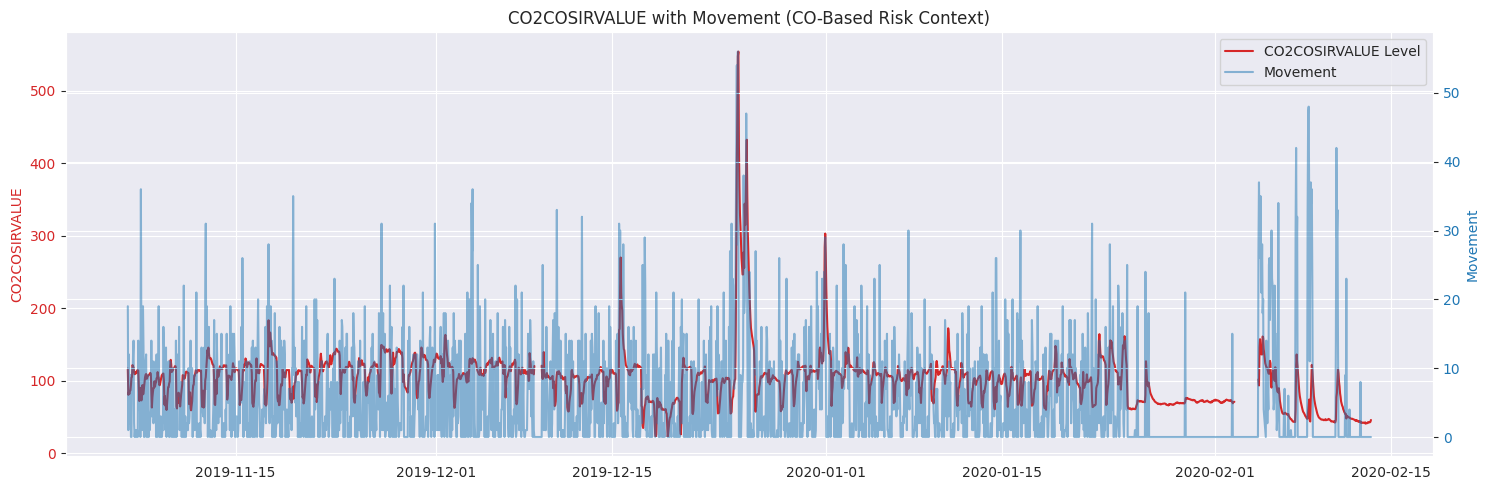

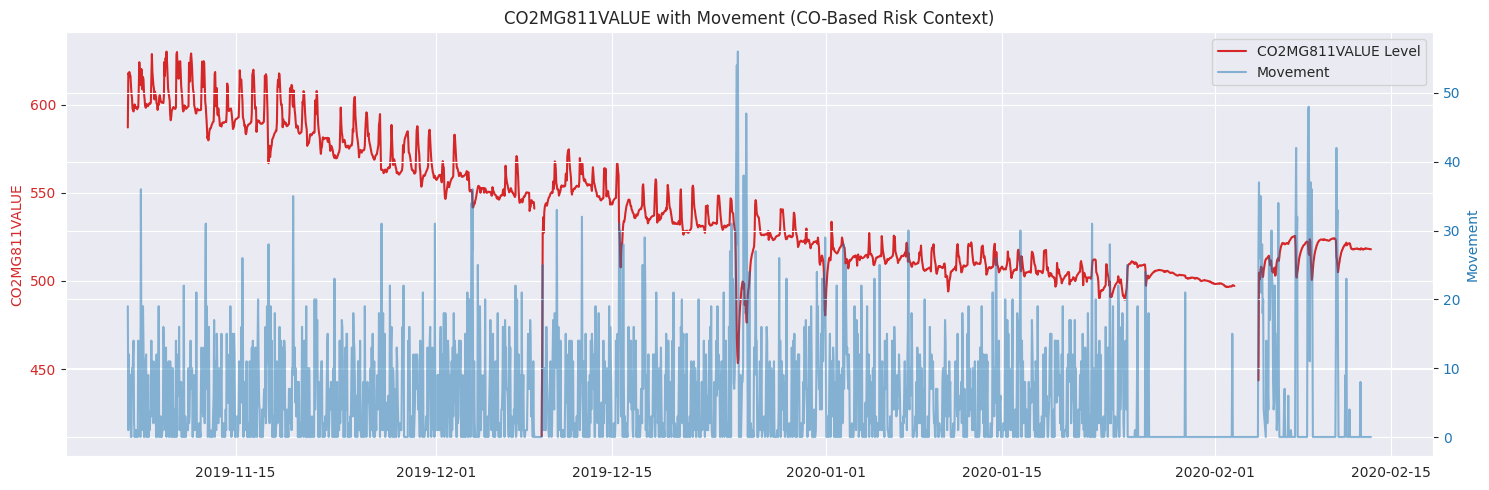

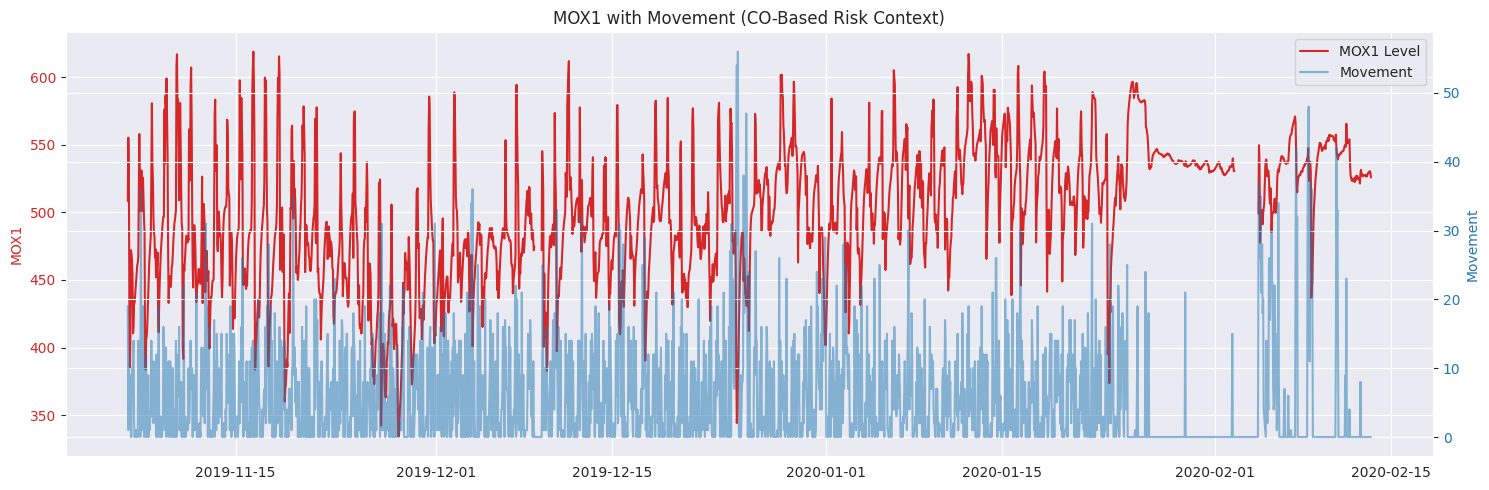

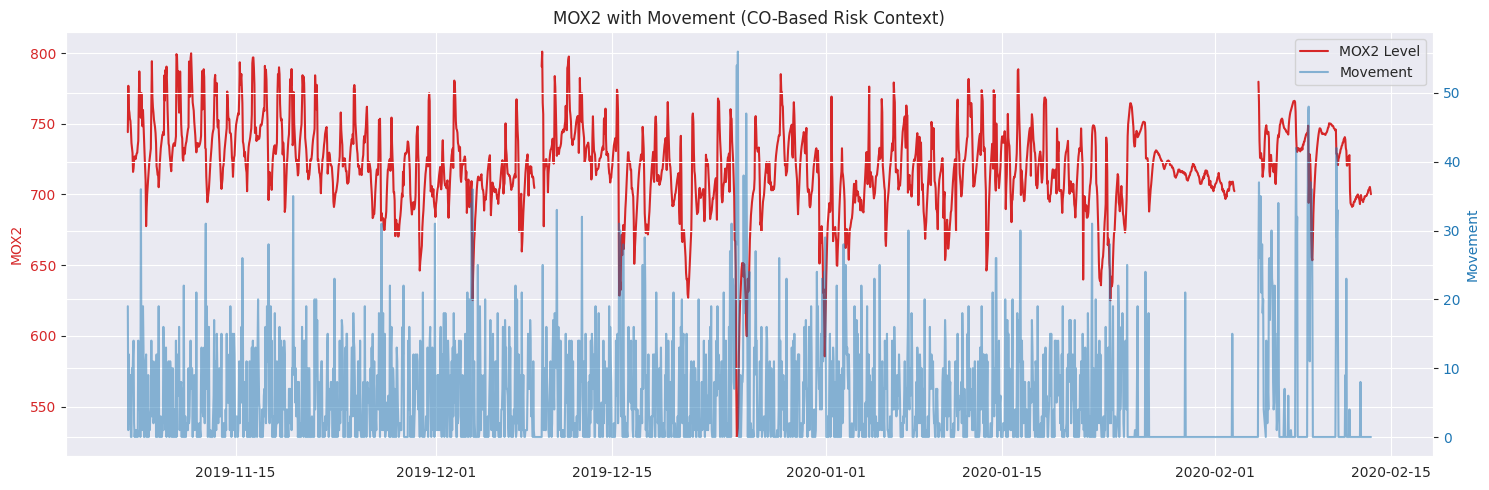

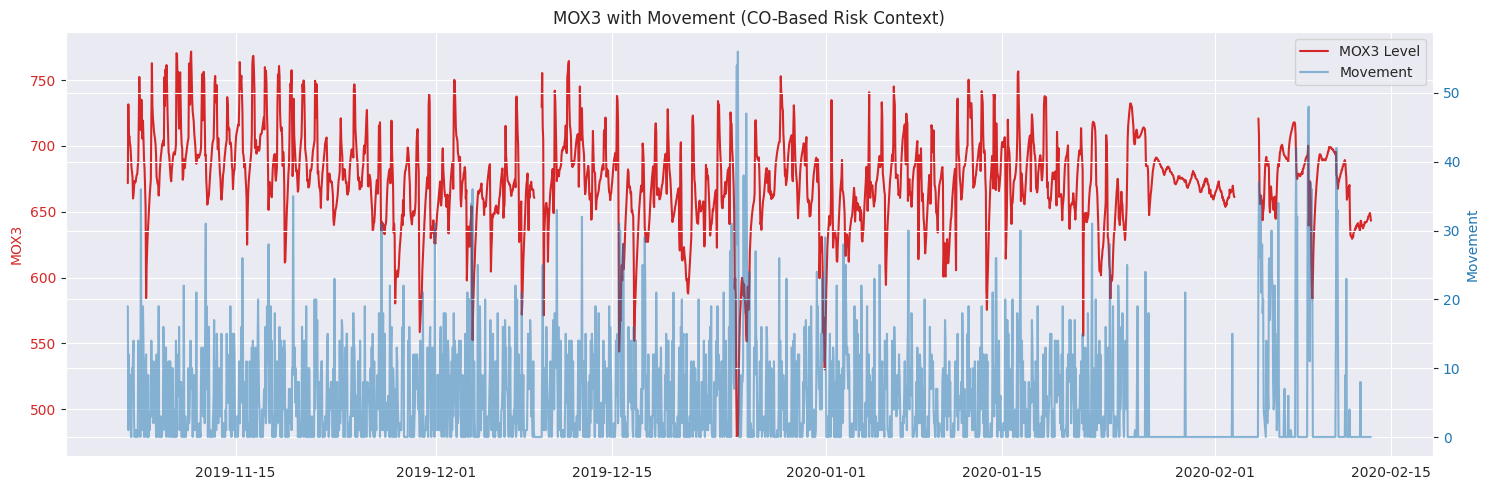

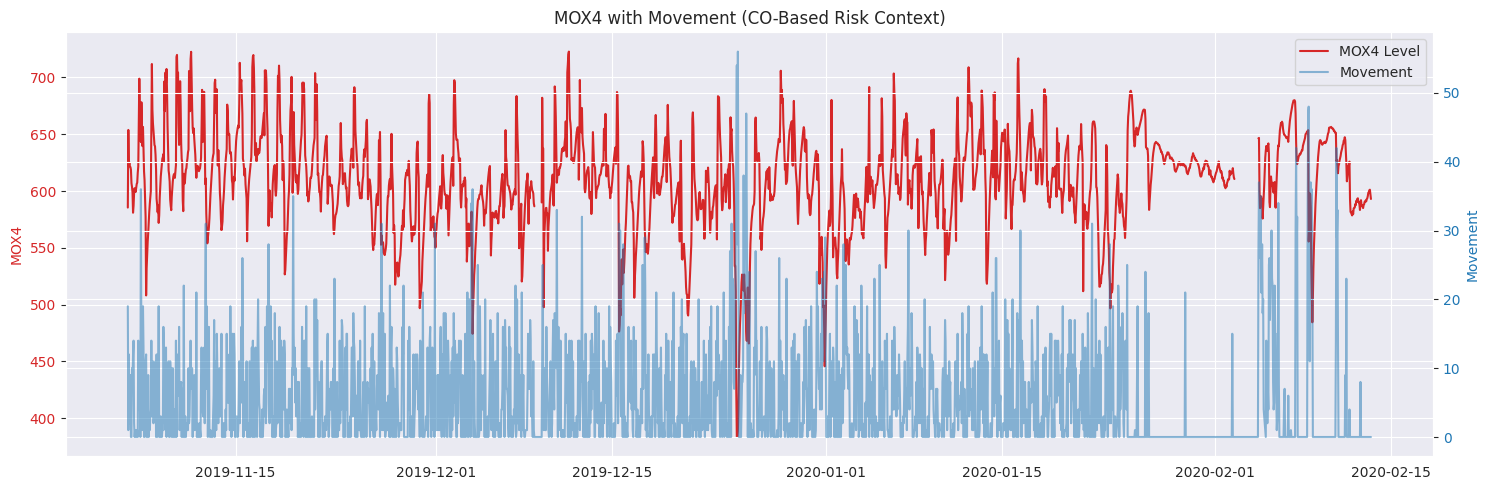

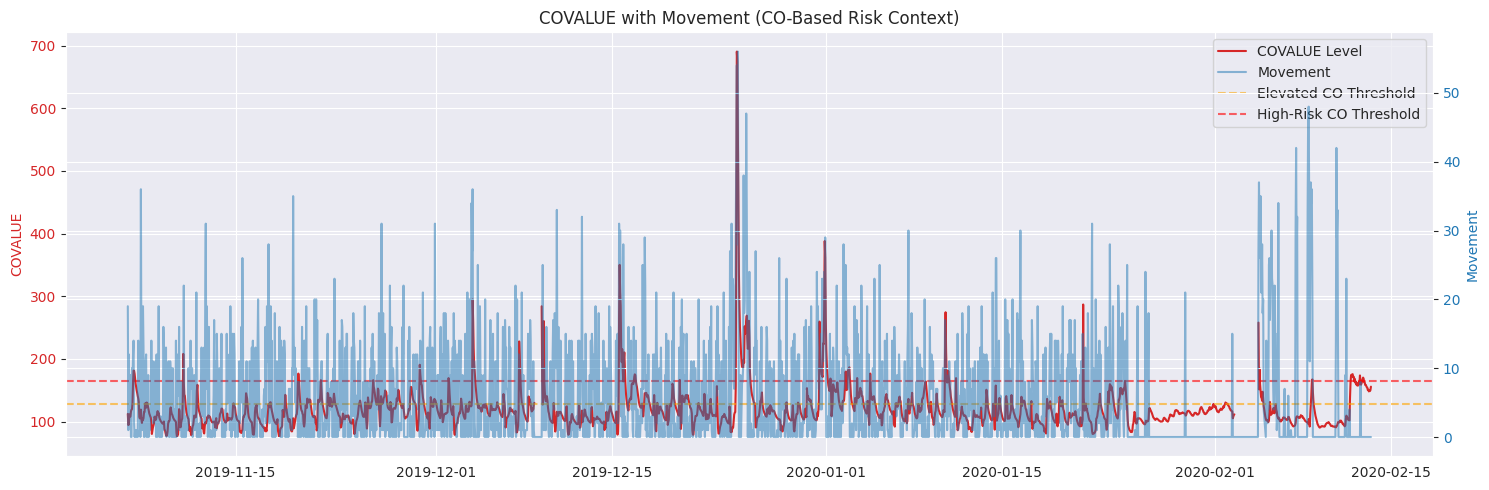

In [231]:
#Multi-sensor timeline overlay
#Gas + Movement + Temperature + Humidity

gas_cols = [
    'co2cosirvalue',
    'co2mg811value',
    'mox1', 'mox2', 'mox3', 'mox4',
    'covalue'
]

for col in gas_cols:

    fig, ax1 = plt.subplots(figsize=(15,5))

    # ---- Gas signal (primary axis) ----
    gas_line, = ax1.plot(
        merged_df['timestamp'],
        merged_df[col],
        color='tab:red',
        label=f'{col.upper()} Level'
    )

    # CO-based thresholds ONLY for CO
    threshold_lines = []
    if col == 'covalue':
        elev_line = ax1.axhline(
            gas_on_threshold,
            color='orange',
            linestyle='--',
            alpha=0.6,
            label='Elevated CO Threshold'
        )
        risk_line = ax1.axhline(
            risk_threshold,
            color='red',
            linestyle='--',
            alpha=0.6,
            label='High-Risk CO Threshold'
        )
        threshold_lines.extend([elev_line, risk_line])

    ax1.set_ylabel(col.upper(), color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    # ---- Movement
    ax2 = ax1.twinx()
    mov_line, = ax2.plot(
        merged_df['timestamp'],
        merged_df['movement'],
        color='tab:blue',
        alpha=0.5,
        label='Movement'
    )
    ax2.set_ylabel('Movement', color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    # ---- COMBINED LEGEND (this is the fix) ----
    lines = [gas_line, mov_line] + threshold_lines
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc='upper right')

    plt.title(f'{col.upper()} with Movement (CO-Based Risk Context)')
    fig.tight_layout()
    plt.show()


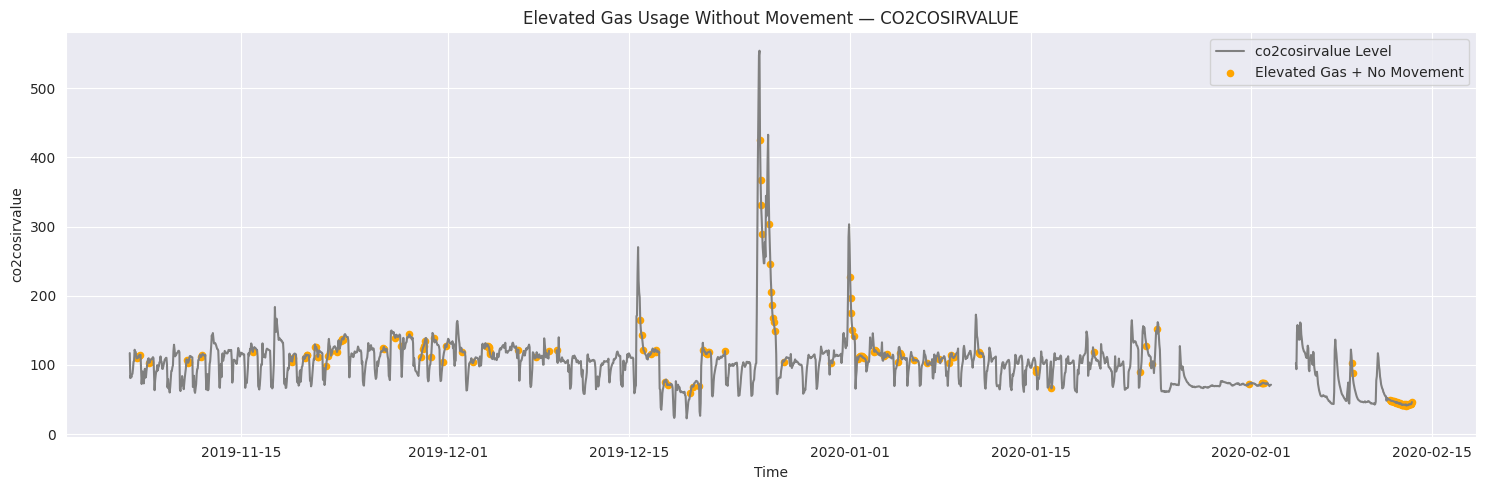

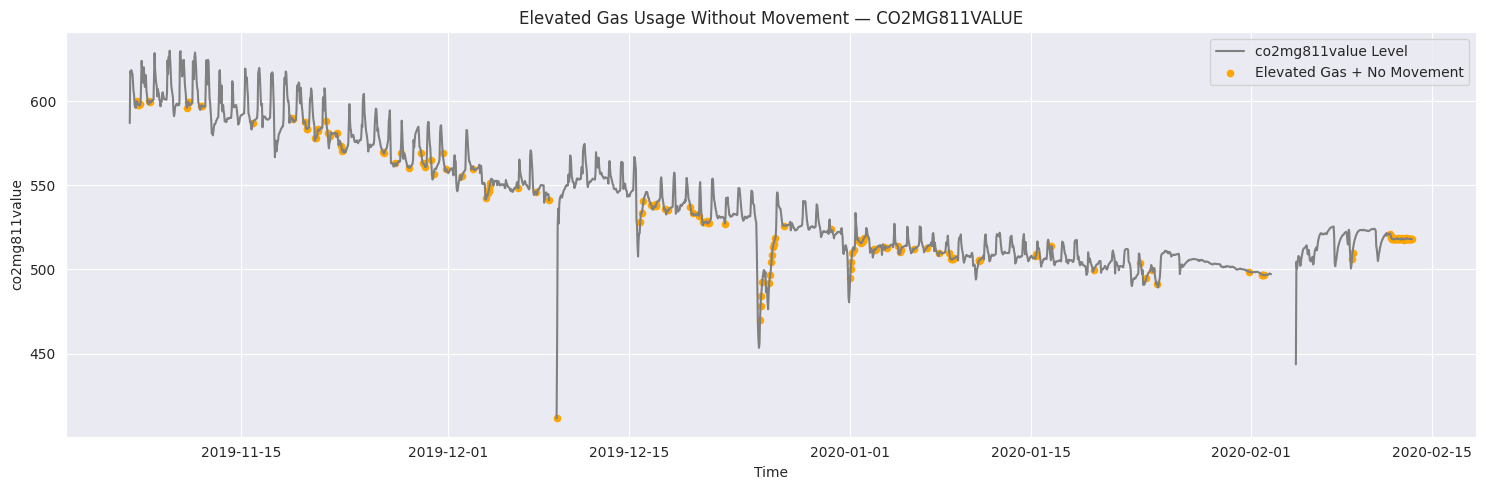

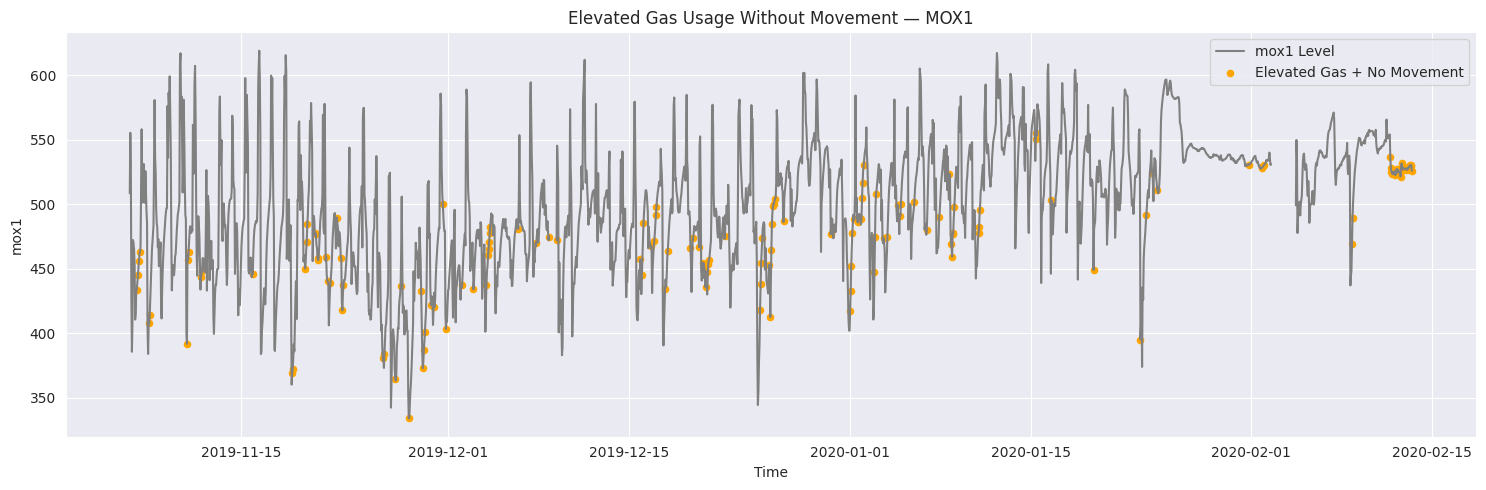

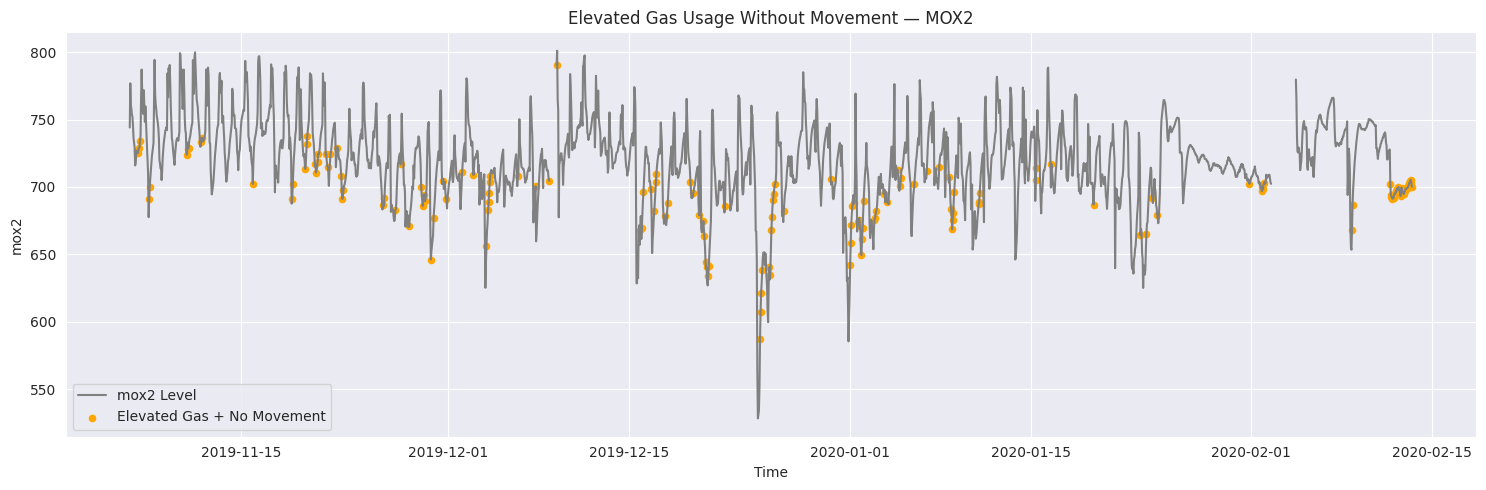

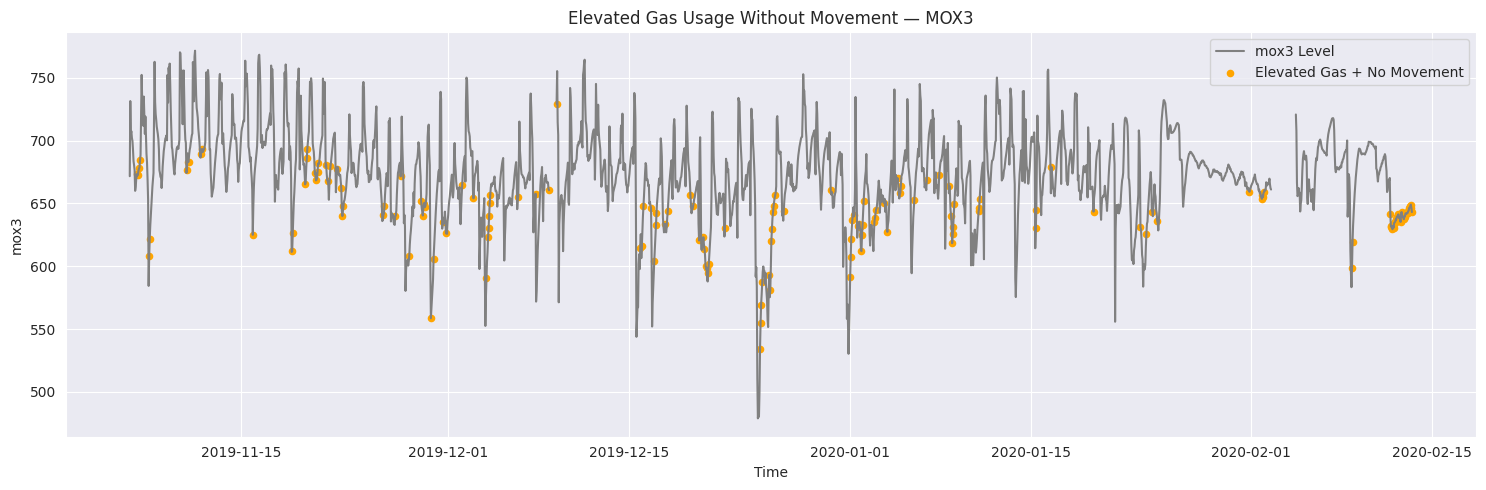

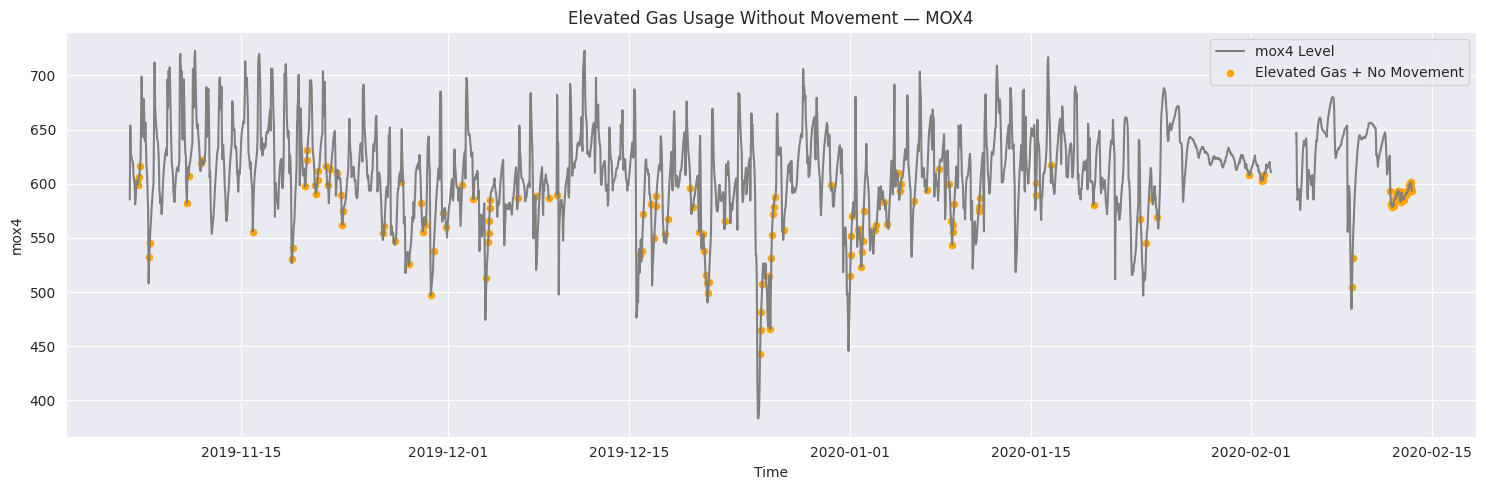

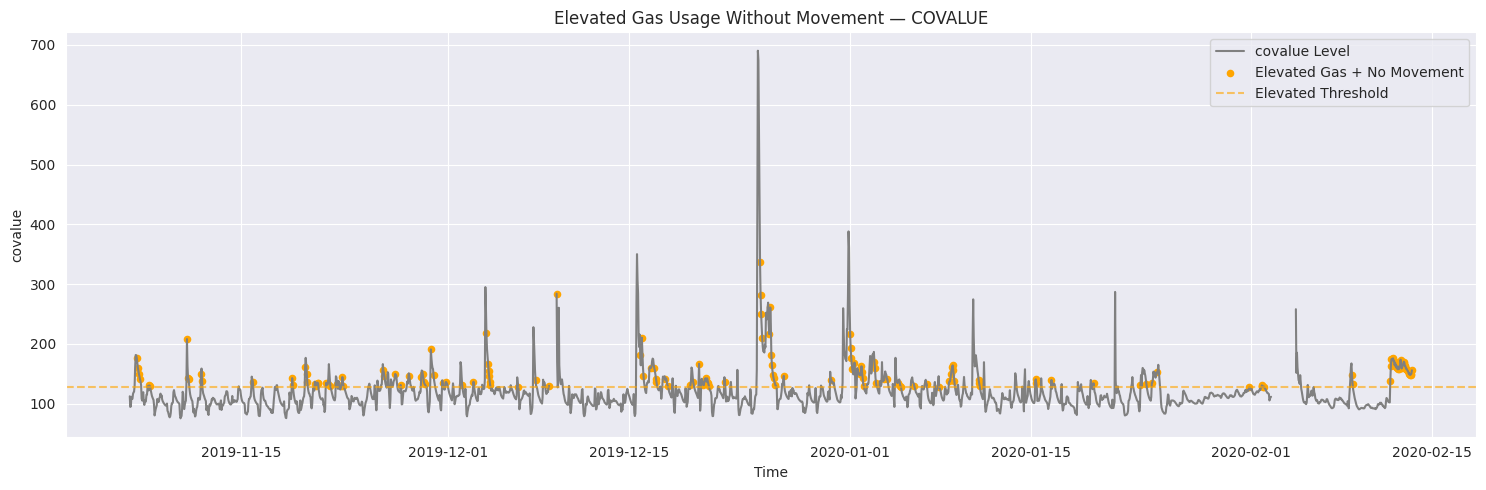

In [232]:
#Highlight Elevated Gas + No Movement
gas_cols = [
    'co2cosirvalue',
    'co2mg811value',
    'mox1', 'mox2', 'mox3', 'mox4',
    'covalue'
]

for col in gas_cols:

    plt.figure(figsize=(15,5))

    # Plot gas signal
    plt.plot(
        merged_df['timestamp'],
        merged_df[col],
        color='gray',
        label=f'{col} Level'
    )

    # Highlight Elevated Gas + No Movement
    plt.scatter(
        merged_df.loc[merged_df['risk_basic'], 'timestamp'],
        merged_df.loc[merged_df['risk_basic'], col],
        color='orange',
        s=20,
        label='Elevated Gas + No Movement'
    )

    # Only draw threshold line for covalue (since that’s how risk was defined)
    if col == 'covalue':
        plt.axhline(
            gas_on_threshold,
            color='orange',
            linestyle='--',
            alpha=0.6,
            label='Elevated Threshold'
        )

    plt.title(f'Elevated Gas Usage Without Movement — {col.upper()}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()


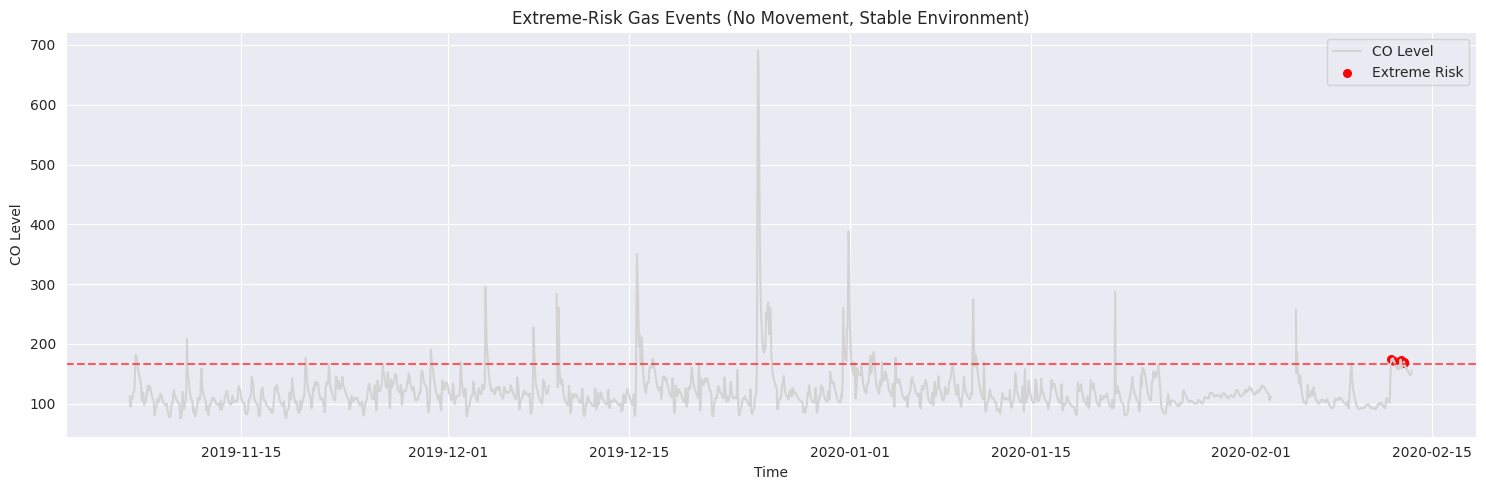

In [233]:
#Highlight Highest-Risk Periods
plt.figure(figsize=(15,5))

plt.plot(
    merged_df['timestamp'],
    merged_df['covalue'],
    color='lightgray',
    label='CO Level'
)

plt.scatter(
    merged_df.loc[merged_df['risk_extreme'], 'timestamp'],
    merged_df.loc[merged_df['risk_extreme'], 'covalue'],
    color='red',
    s=30,
    label='Extreme Risk'
)

plt.axhline(risk_threshold, color='red', linestyle='--', alpha=0.6)

plt.title('Extreme-Risk Gas Events (No Movement, Stable Environment)')
plt.xlabel('Time')
plt.ylabel('CO Level')
plt.legend()
plt.tight_layout()
plt.show()


In [234]:
#Long inactivity windows (duration of elevated gas)
merged_df['risk_block'] = (
    merged_df['risk_basic']
    .ne(merged_df['risk_basic'].shift())
    .cumsum()
)

risk_windows = (
    merged_df[merged_df['risk_basic']]
    .groupby('risk_block')
    .agg(
        start_time=('timestamp', 'min'),
        end_time=('timestamp', 'max')
    )
)

risk_windows['duration_hours'] = (
    risk_windows['end_time'] - risk_windows['start_time']
).dt.total_seconds() / 3600


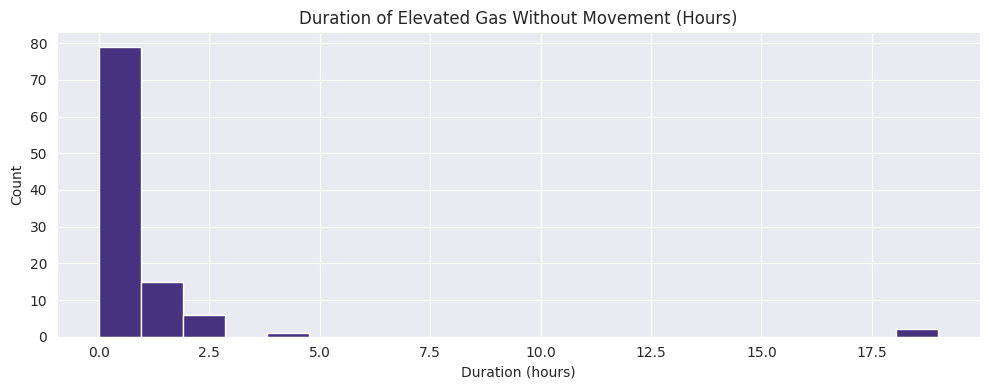

In [235]:
#Duration distribution
risk_windows['duration_hours'].plot(
    kind='hist',
    bins=20,
    figsize=(10,4),
    title='Duration of Elevated Gas Without Movement (Hours)'
)

plt.xlabel('Duration (hours)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


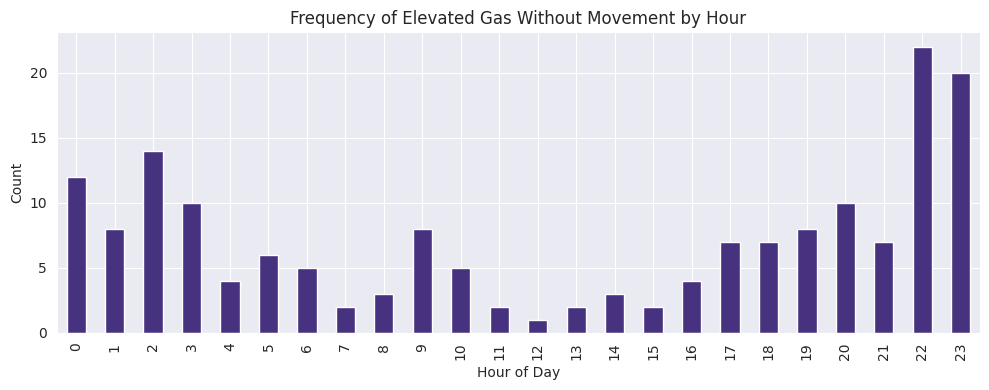

In [236]:
#Time-of-day pattern (night / early morning)
merged_df['hour'] = merged_df['timestamp'].dt.hour

risk_by_hour = (
    merged_df.loc[merged_df['risk_basic']]
    .groupby('hour')
    .size()
)

risk_by_hour.plot(
    kind='bar',
    figsize=(10,4),
    title='Frequency of Elevated Gas Without Movement by Hour'
)

plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#14: Correlation & Dependency Analysis
This is to quantify relationships between key sensor variables and temporal factors in order to understand how different signals interact in the context of elder safety monitoring.

#14.1: Variables for analysis

In [237]:


# Gas usage intensity
merged_df['gas_intensity'] = merged_df['covalue']

# Movement frequency
merged_df['movement_freq'] = merged_df['movement']

# Time-of-day feature
merged_df['hour'] = merged_df['timestamp'].dt.hour


#14.2 Correlation matrix

Here we check if gas, movement, and environment are related?

In [239]:
corr_cols = [
    'gas_intensity',
    'movement_freq',
    'temperature',
    'humidity',
    'hour'
]

corr_matrix = merged_df[corr_cols].corr()
corr_matrix


gas_intensity  movement_freq  temperature  humidity      hour
gas_intensity       1.000000       0.241680     0.360429  0.131829  0.169653
movement_freq       0.241680       1.000000     0.099397 -0.098517  0.171901
temperature         0.360429       0.099397     1.000000 -0.022713  0.454335
humidity            0.131829      -0.098517    -0.022713  1.000000 -0.237061
hour                0.169653       0.171901     0.454335 -0.237061  1.000000

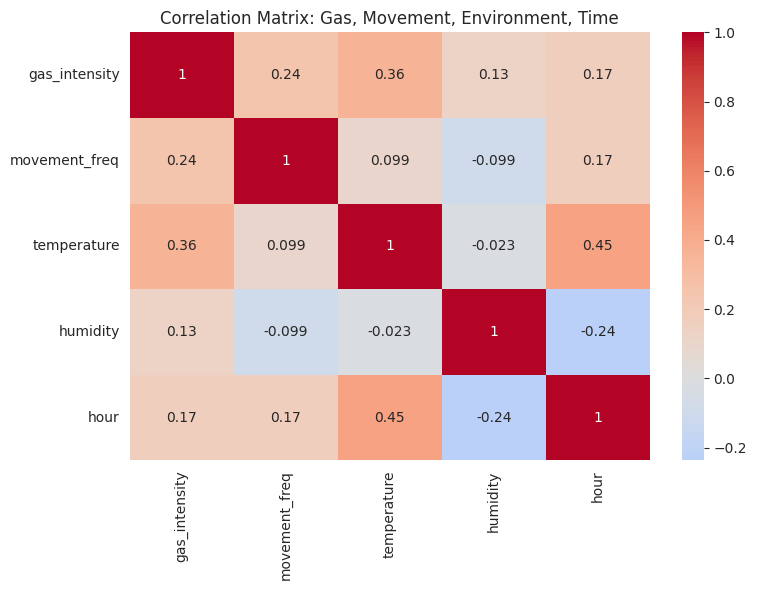

In [240]:


plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title('Correlation Matrix: Gas, Movement, Environment, Time')
plt.tight_layout()
plt.show()


#14.3 Scatter plots (dependency inspection)
Gas intensity vs movement to:

check whether gas usage is activity-driven

identify gas events without movement

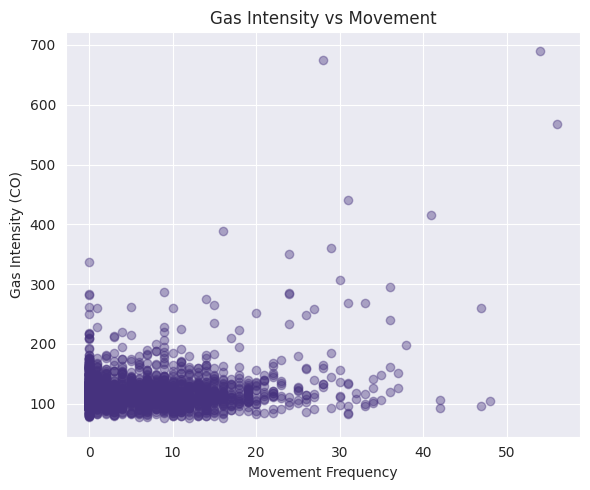

In [243]:
plt.figure(figsize=(6,5))
plt.scatter(
    merged_df['movement_freq'],
    merged_df['gas_intensity'],
    alpha=0.4
)
plt.xlabel('Movement Frequency')
plt.ylabel('Gas Intensity (CO)')
plt.title('Gas Intensity vs Movement')
plt.tight_layout()
plt.show()


#14.4: Gas intensity vs time of day
The goal here is to:

detect night / early morning risk patterns

identify recurring temporal dependencies

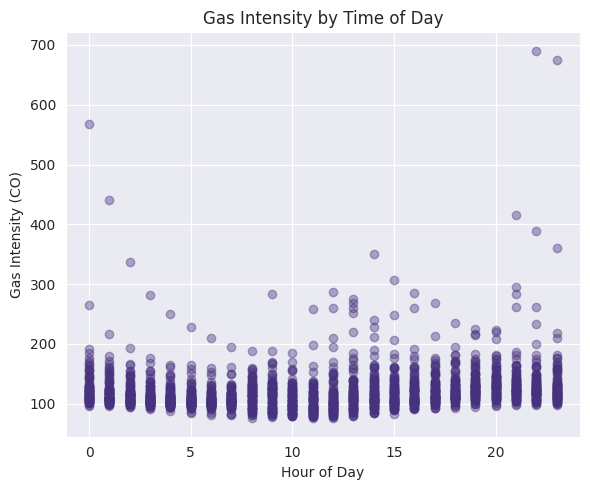

In [244]:
plt.figure(figsize=(6,5))
plt.scatter(
    merged_df['hour'],
    merged_df['gas_intensity'],
    alpha=0.4
)
plt.xlabel('Hour of Day')
plt.ylabel('Gas Intensity (CO)')
plt.title('Gas Intensity by Time of Day')
plt.tight_layout()
plt.show()


#15: Conditional summaries

Gas usage under different behavioral conditions

In [245]:
gas_by_activity = (
    merged_df
    .assign(active=merged_df['movement_freq'] > 0)
    .groupby('active')['gas_intensity']
    .describe()
)

gas_by_activity


count        mean        std        min         25%         50%  \
active                                                                     
False    822.0  117.681620  24.828251  77.216667  102.741667  112.347222   
True    1497.0  121.607235  39.794803  75.477778  103.311111  114.211111   

               75%         max  
active                          
False   124.126389  336.694444  
True    129.605556  690.372222